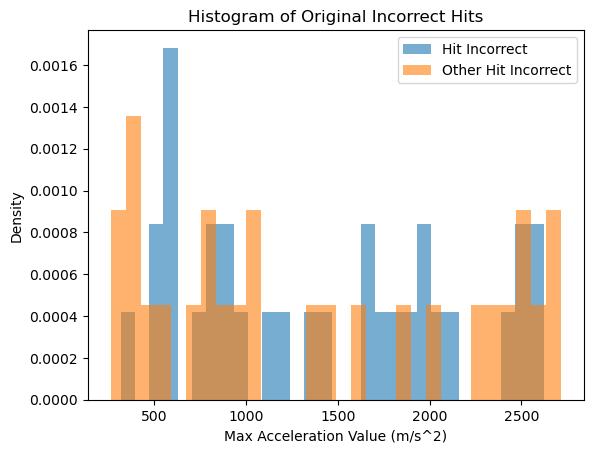

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

original = pd.read_csv('temporary_df.csv')
# simulated = pd.read_csv('cleaned_updated_balanced_data.csv')

og_hit_incorrect = original[original['target'] == 1]
og_other_hit_incorrect = original[original['target'] == 4]

plt.hist(og_hit_incorrect['max_acc_time'], bins=30, density=True, alpha=0.6, label='Hit Incorrect')
plt.hist(og_other_hit_incorrect['max_acc_time'], bins=30, density=True, alpha=0.6, label='Other Hit Incorrect')
plt.xlabel('Max Acceleration Value (m/s^2)')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Original Incorrect Hits')
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv('df_FINAL-5.csv')
# print(data.head())

# Replaces NaN values with the mean
# data['confidence_score'].fillna(data['confidence_score'].mean(), inplace=True)


variable_under_investigation = ['confidence score', 'experience score','games played prior on current day',  'winner_streak','favorite fruit_prume','favorite fruit_strawberry',  'duration round_seconds',  'before3_mean','before3_min', 'before3_max', 'before2_mean', 'before2_min','before2_max', 'before1_mean', 'before1_min', 'before1_max', 'after1_mean', 'after1_min', 'after1_max', 'after2_mean', 'after2_min','after2_max', 'after3_mean', 'after3_min', 'after3_max','max_acc_value',  'time_diff_max_acc'] # make this a list, so that you can engage for loops afterwards


# Filter the data where 'hit_incorrect' and 'other_hit_incorrect' is true (i.e., equal to 1)
hit_incorrect = data[data['target'] == 1]
other_hit_incorrect = data[data['target'] == 4]

print(f"Number of rows where 'hit_incorrect' is true: {len(hit_incorrect)}")
print(f"Number of rows where 'other_hit_incorrect' is true: {len(other_hit_incorrect)}")

Number of rows where 'hit_incorrect' is true: 31
Number of rows where 'other_hit_incorrect' is true: 27


In [ ]:
def get_descriptives(input_df, variable, printing=False, category_label=None):
  mean = input_df[variable].mean()
  std = input_df[variable].std()
  skew = input_df[variable].skew()
  kurt = input_df[variable].kurt()
  if printing:
    print(f"\nDescriptive Statistics for {variable} (where {category_label} == 1):")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Skewness: {skew}")
    print(f"Kurtosis: {kurt}")

for v in variable_under_investigation:
  get_descriptives(hit_incorrect, v, printing=True, category_label='hit_incorrect')
  get_descriptives(other_hit_incorrect, v, printing=True, category_label='other_hit_incorrect')


Descriptive Statistics for confidence score (where hit_incorrect == 1):
Mean: 2.096774193548387
Standard Deviation: 0.7002303768369103
Skewness: 0.48791305540476665
Kurtosis: 0.7995032954436923

Descriptive Statistics for confidence score (where other_hit_incorrect == 1):
Mean: 2.925925925925926
Standard Deviation: 0.5495400822454191
Skewness: -0.06111456970190392
Kurtosis: 0.6947525809896762

Descriptive Statistics for experience score (where hit_incorrect == 1):
Mean: 5.580645161290323
Standard Deviation: 1.2048289933537486
Skewness: 1.631366154219211
Kurtosis: 0.7024630541871852

Descriptive Statistics for experience score (where other_hit_incorrect == 1):
Mean: 5.888888888888889
Standard Deviation: 1.3959648809042255
Skewness: 0.945582527223019
Kurtosis: -1.2007894736842117

Descriptive Statistics for games played prior on current day (where hit_incorrect == 1):
Mean: 0.4838709677419355
Standard Deviation: 0.7243833120632328
Skewness: 1.1846102931314213
Kurtosis: 0.036320285743411

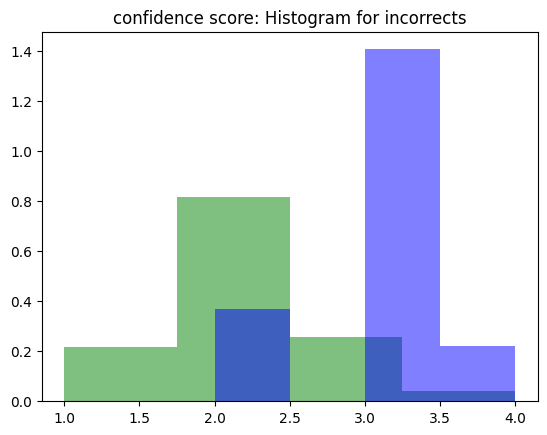

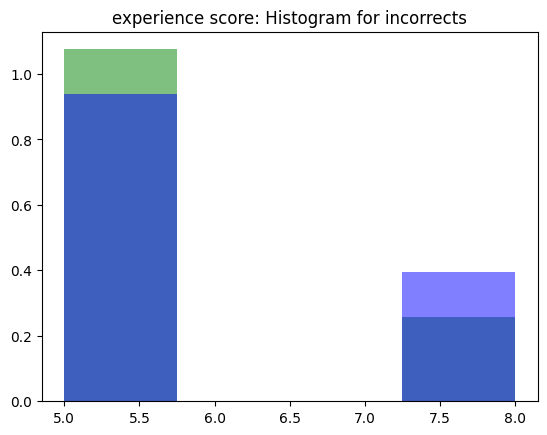

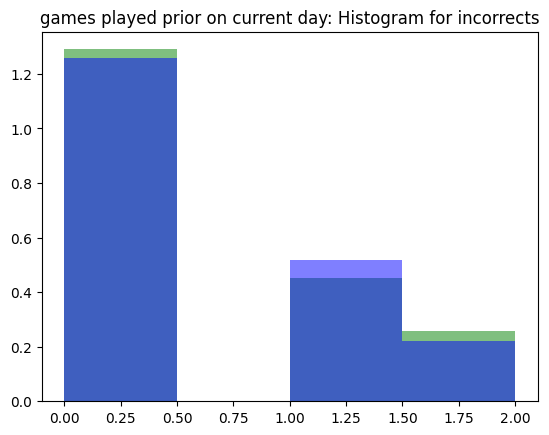

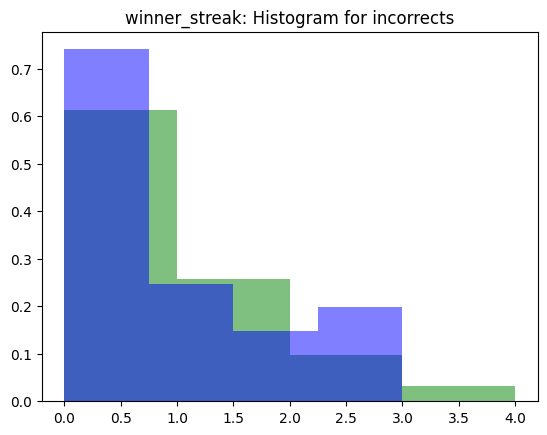

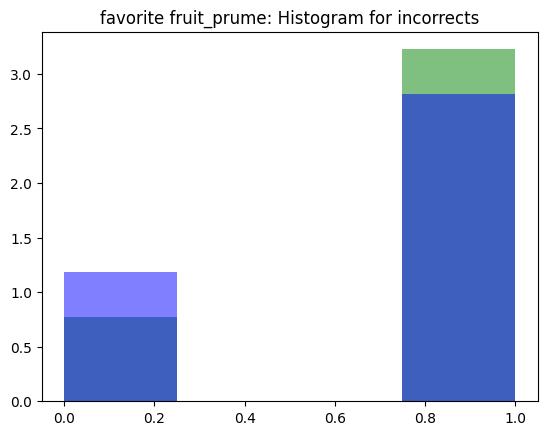

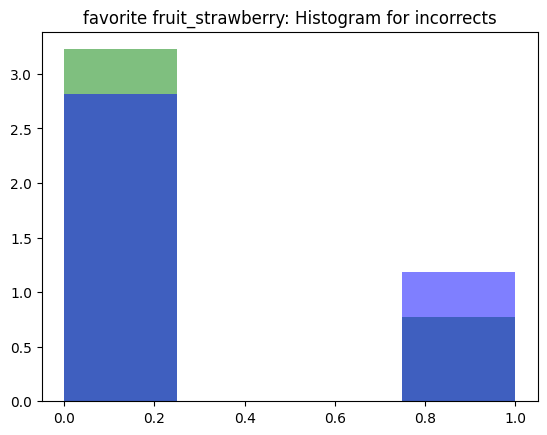

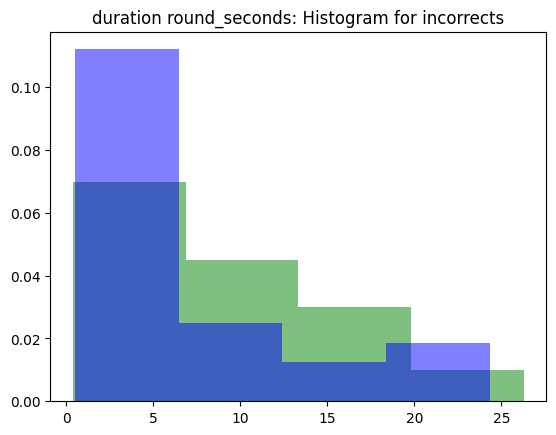

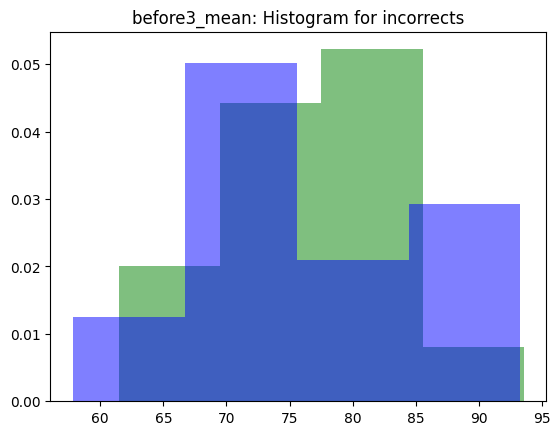

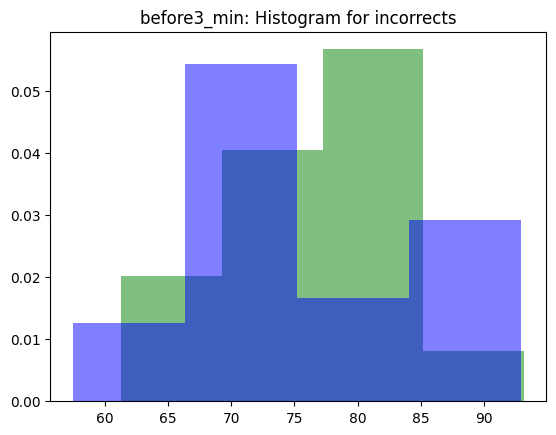

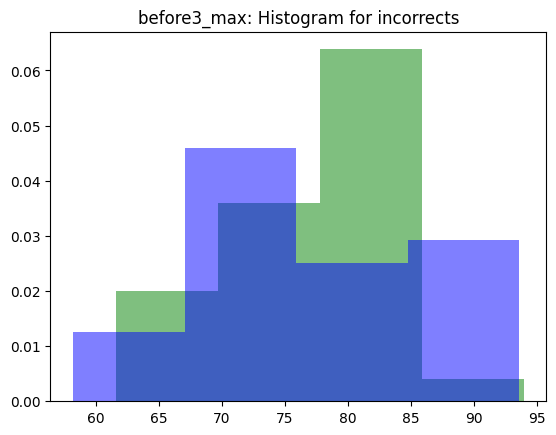

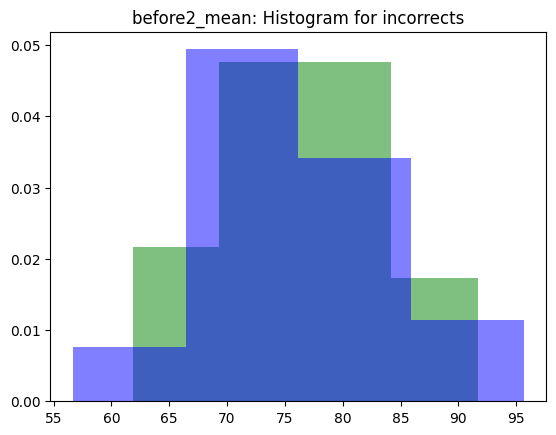

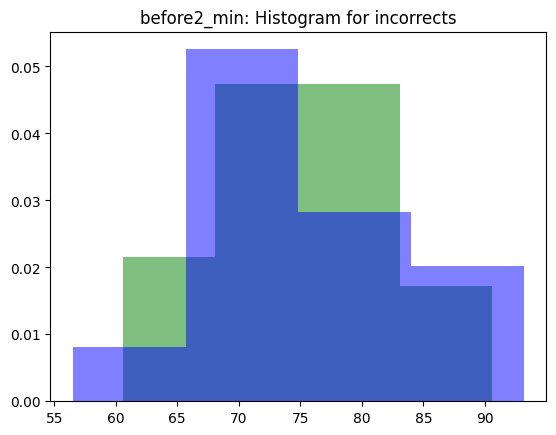

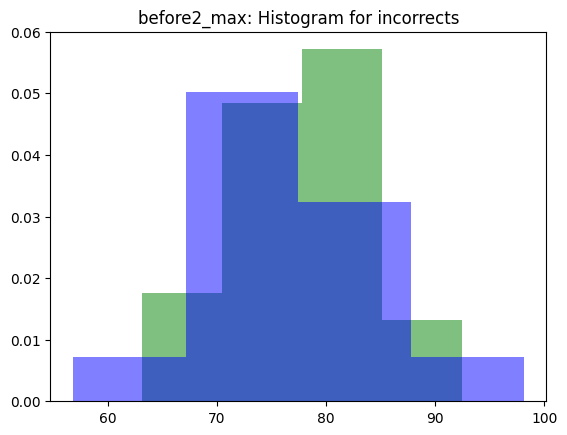

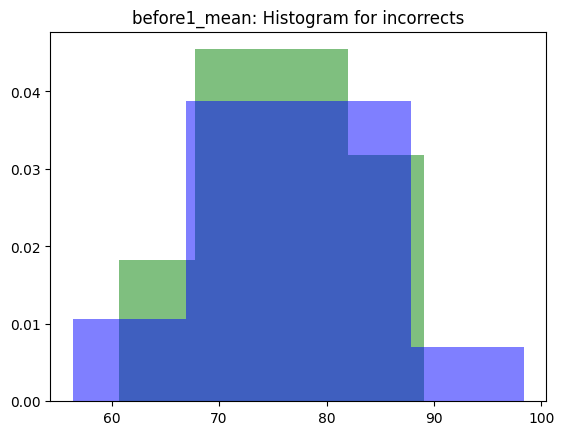

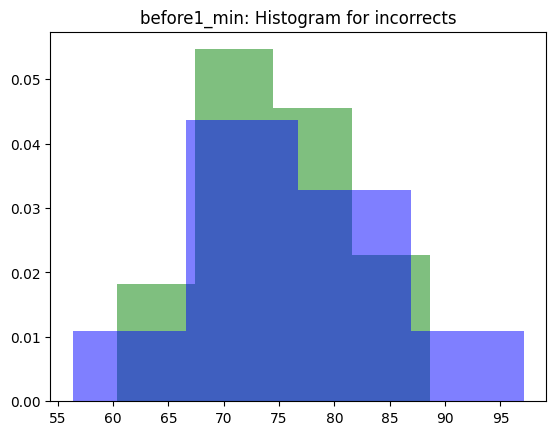

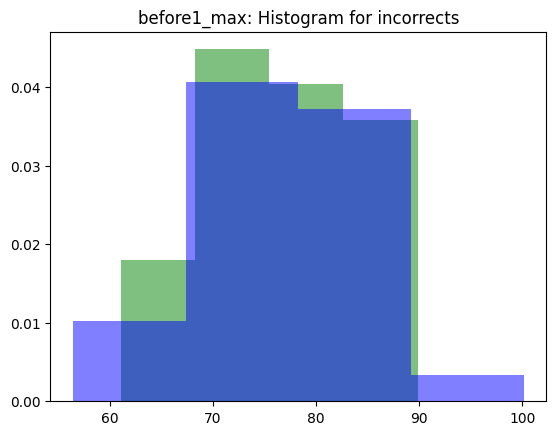

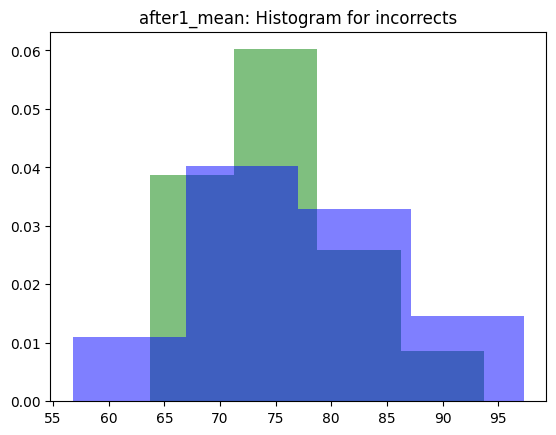

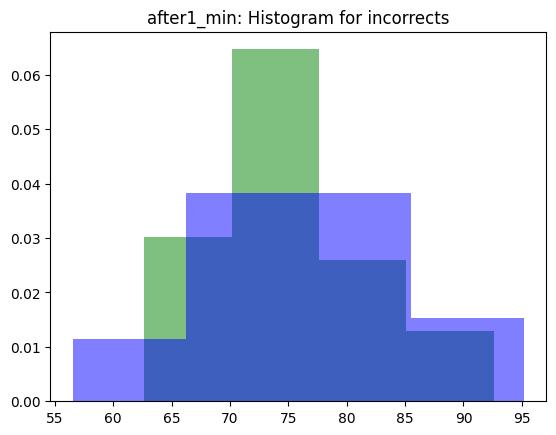

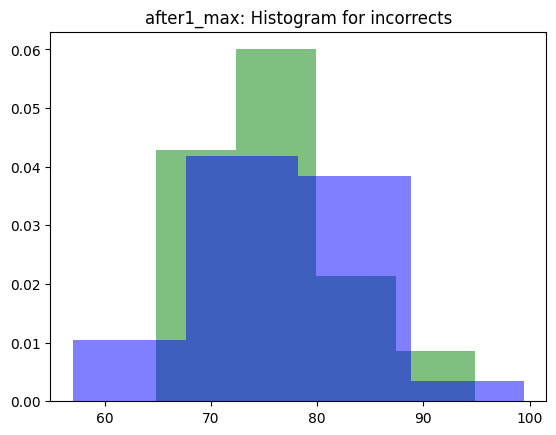

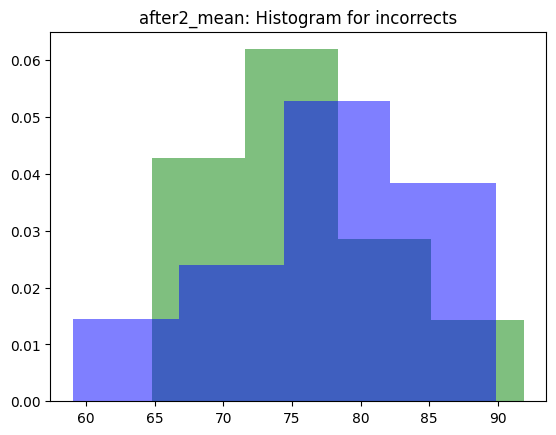

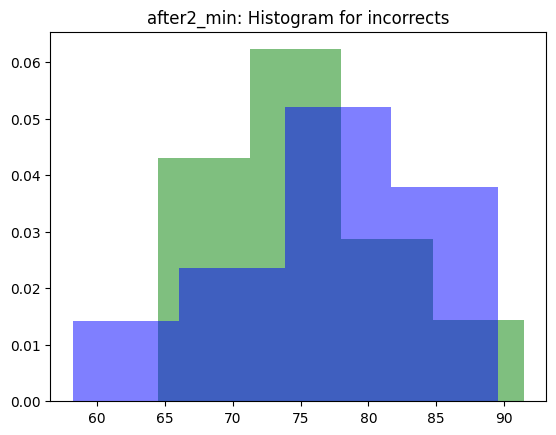

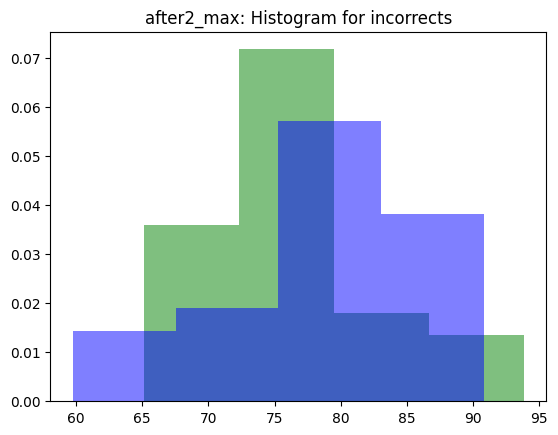

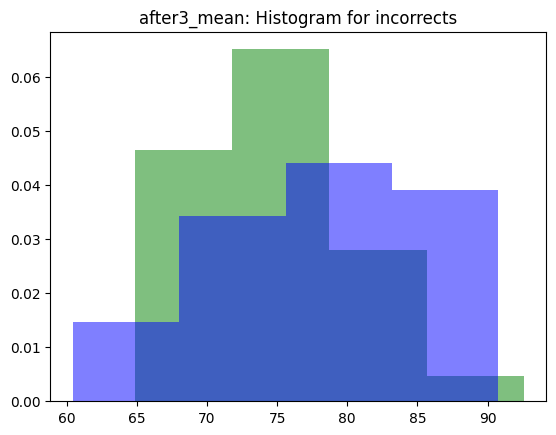

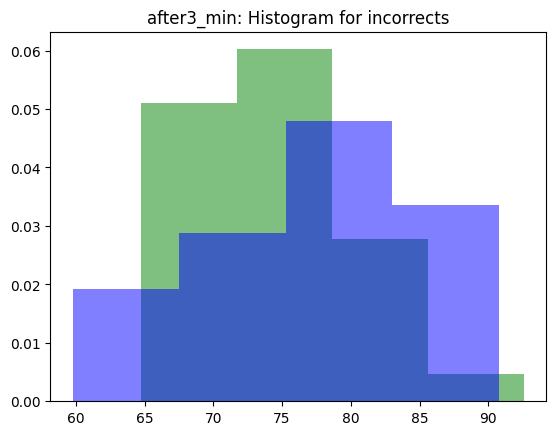

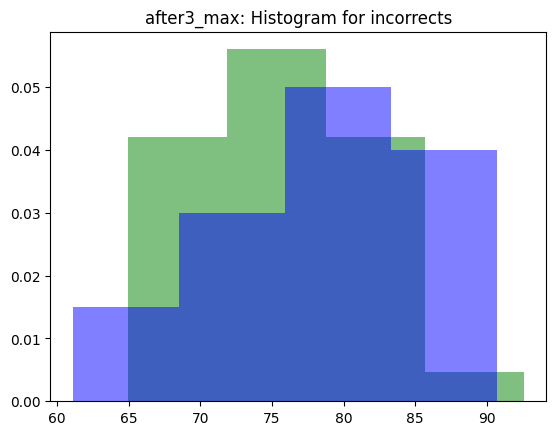

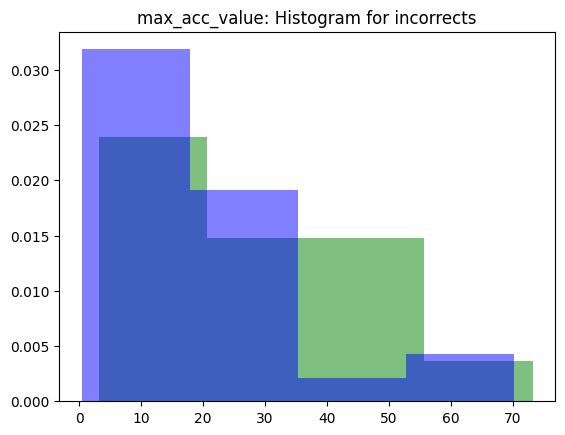

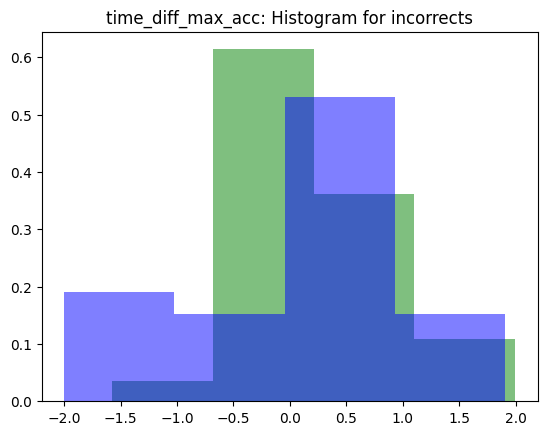

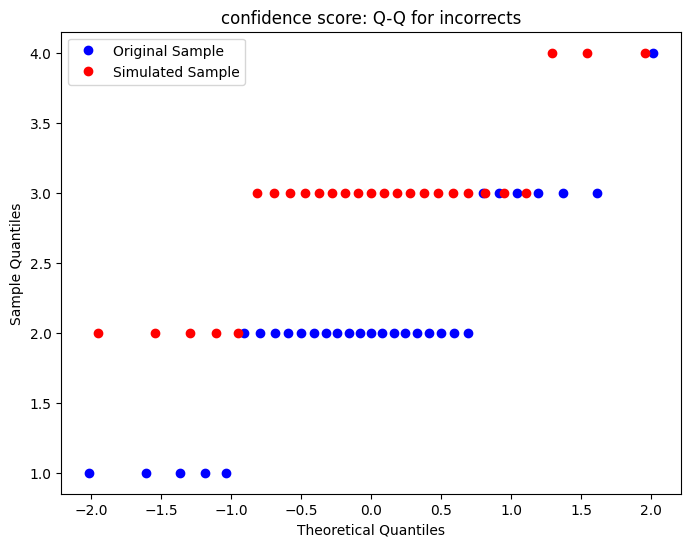

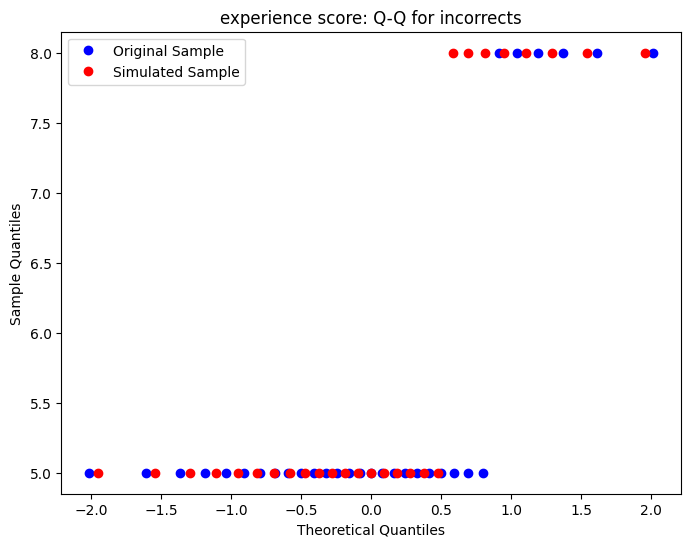

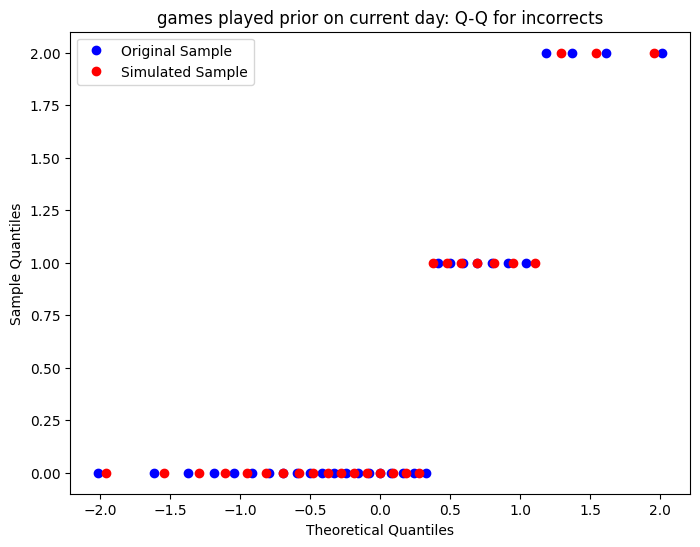

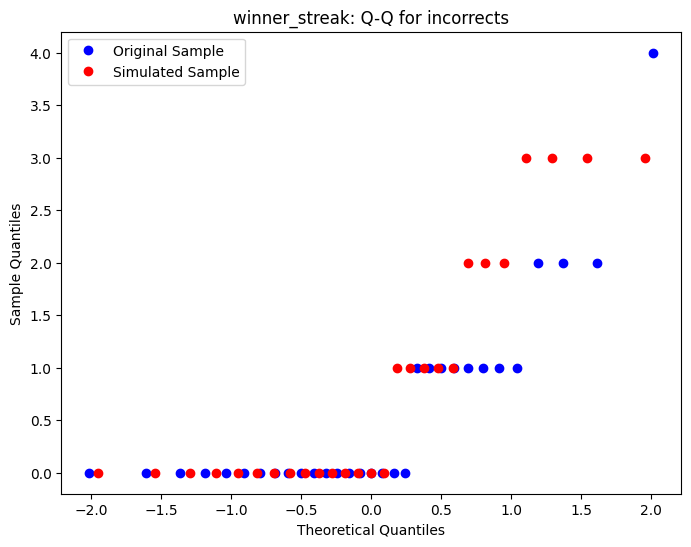

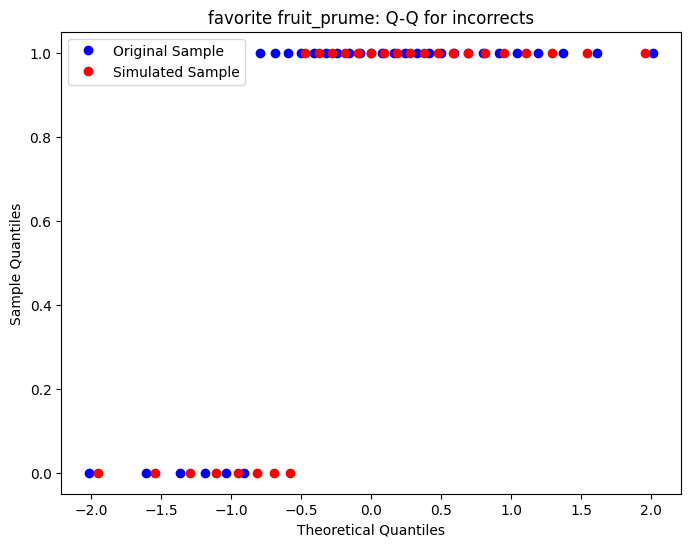

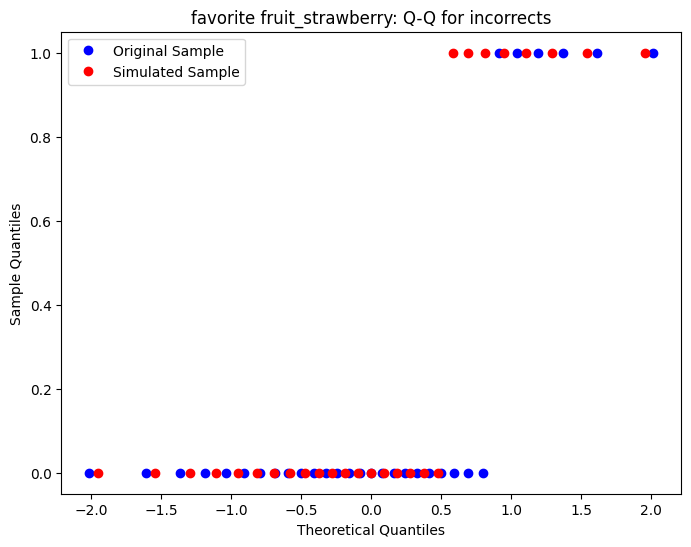

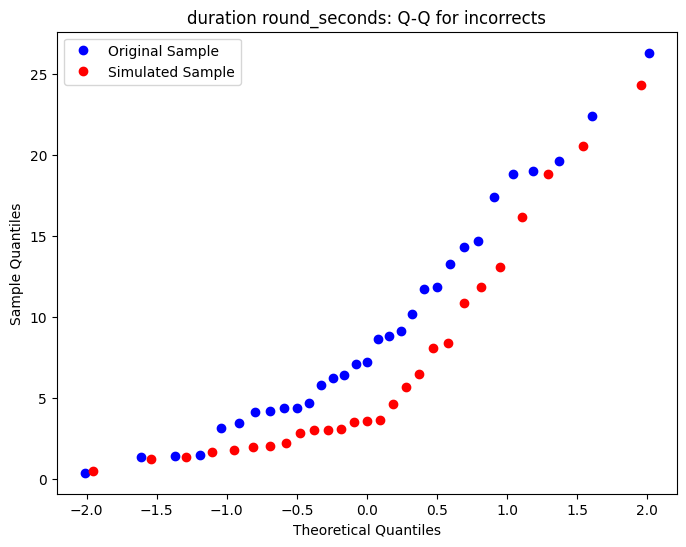

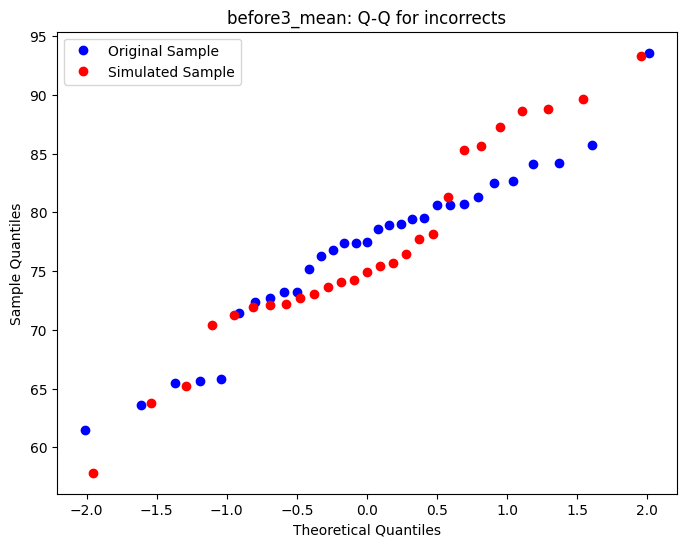

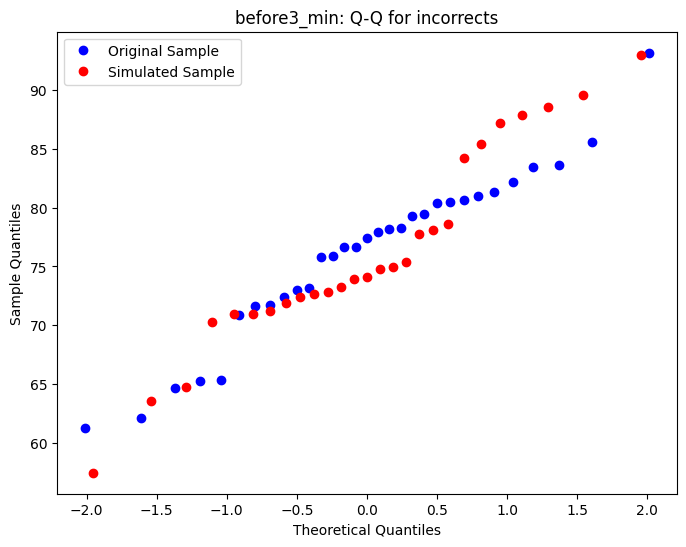

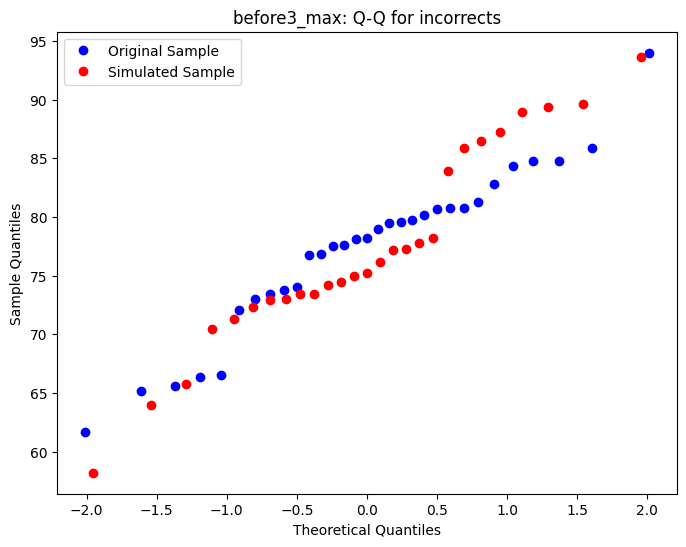

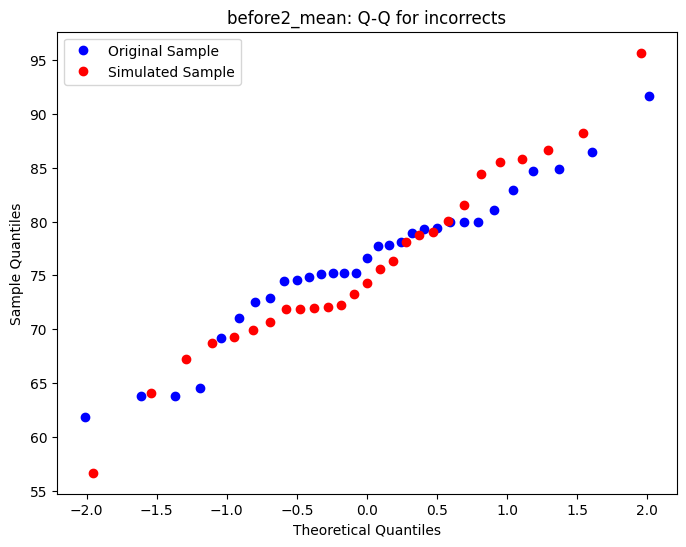

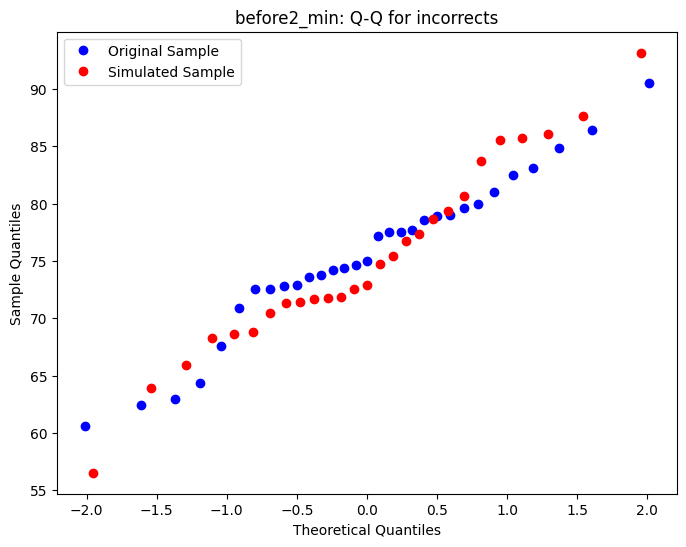

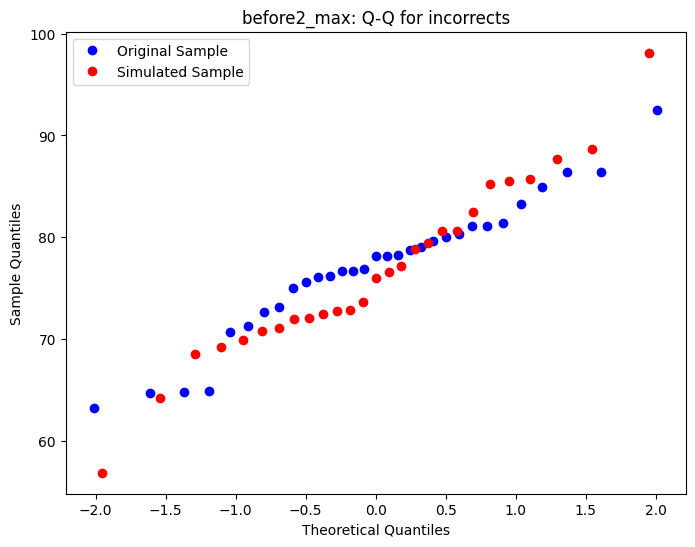

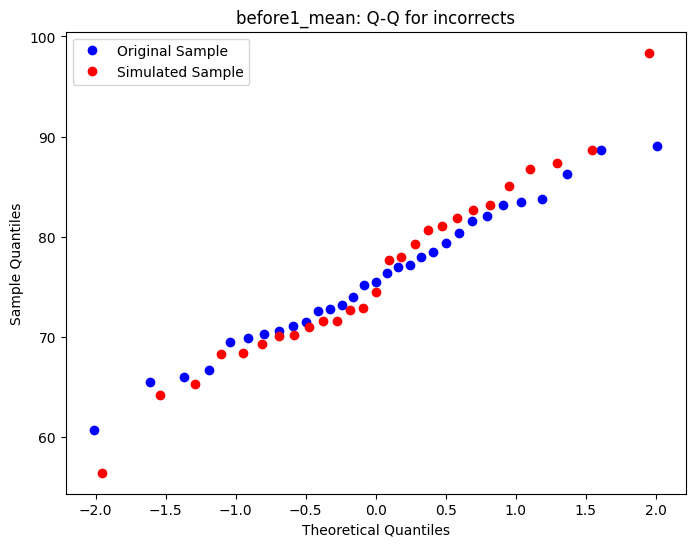

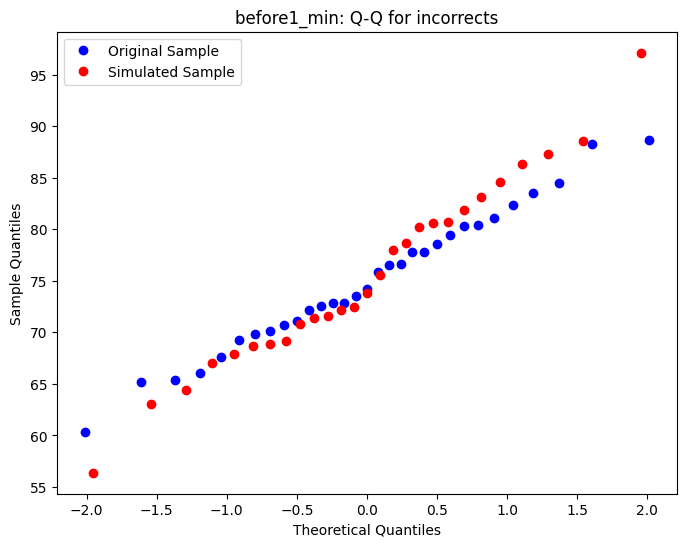

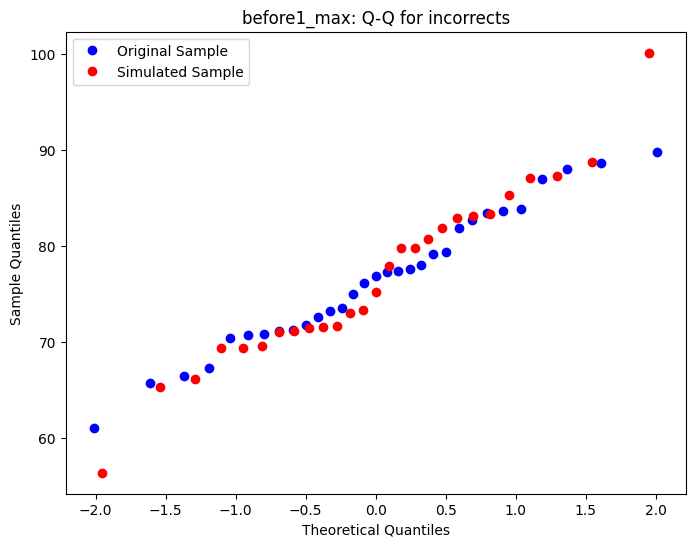

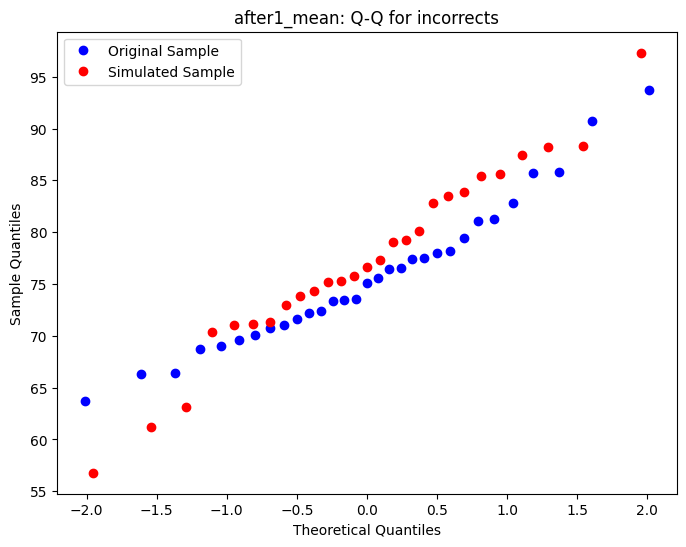

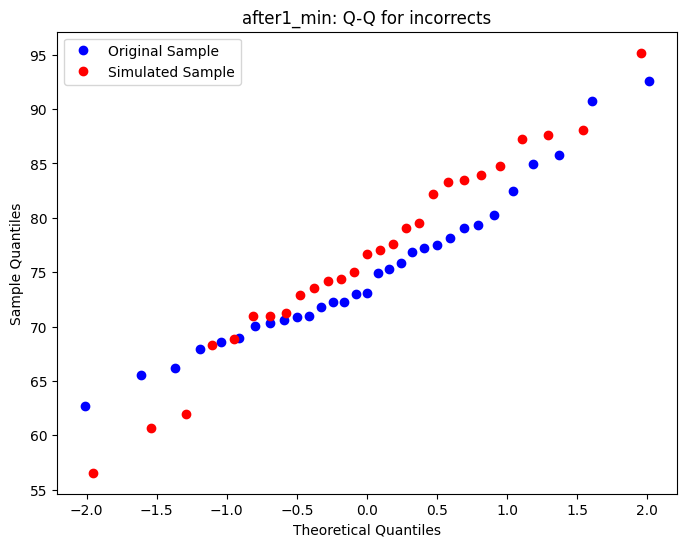

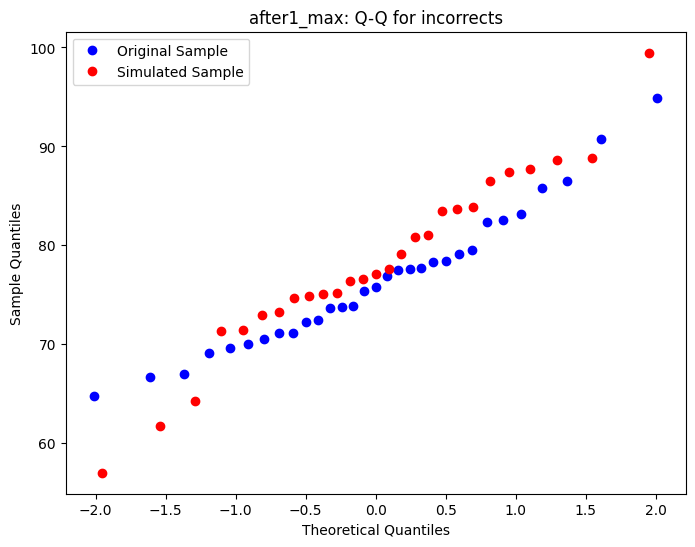

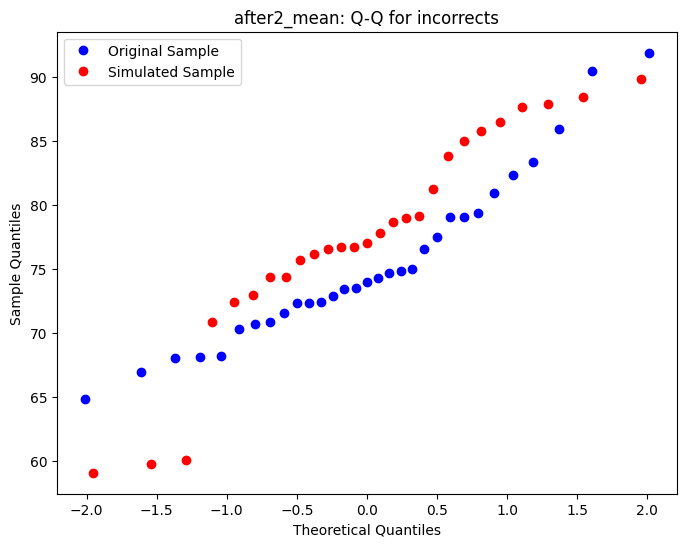

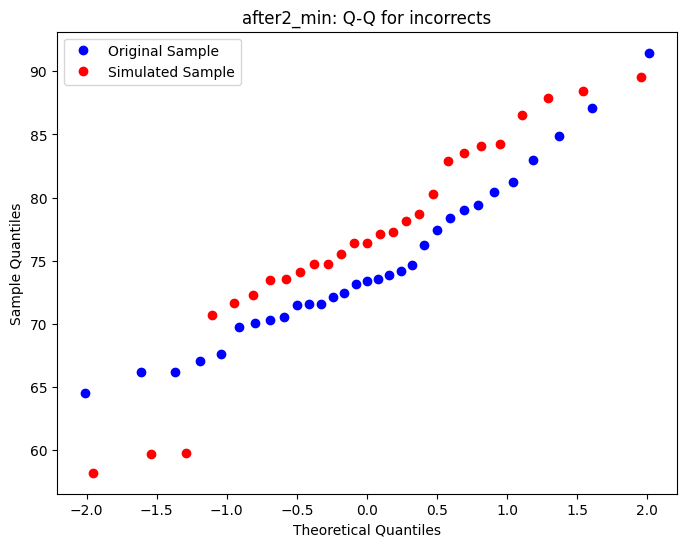

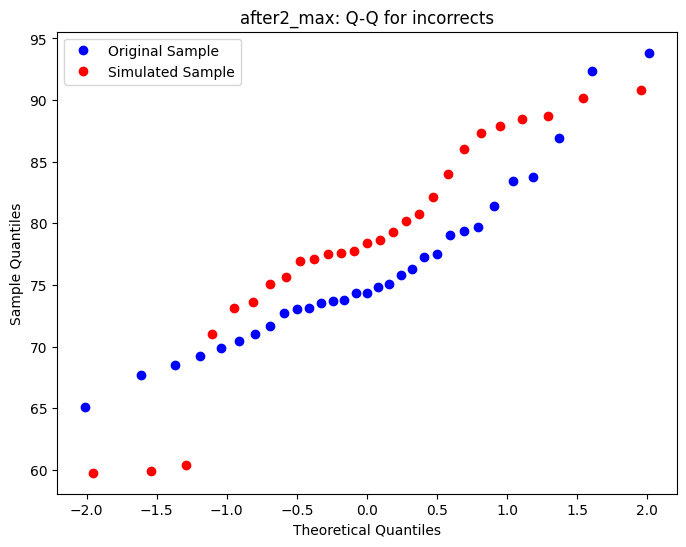

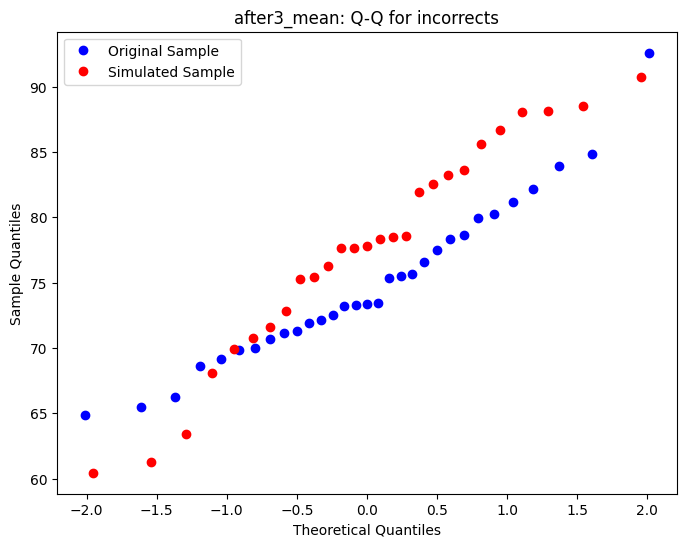

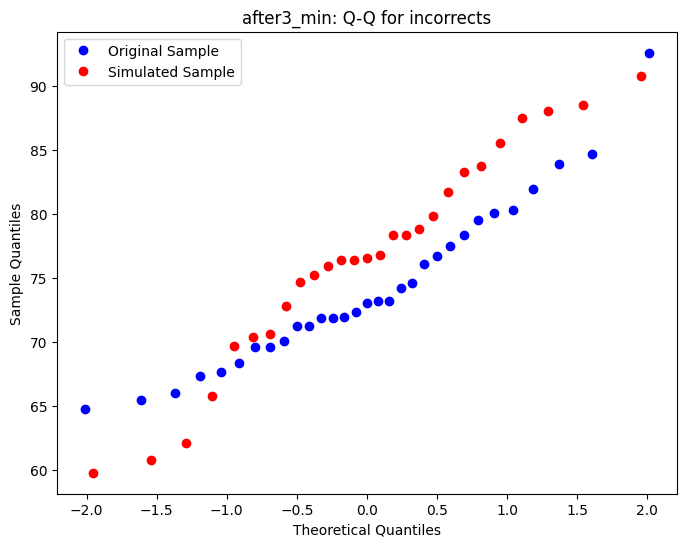

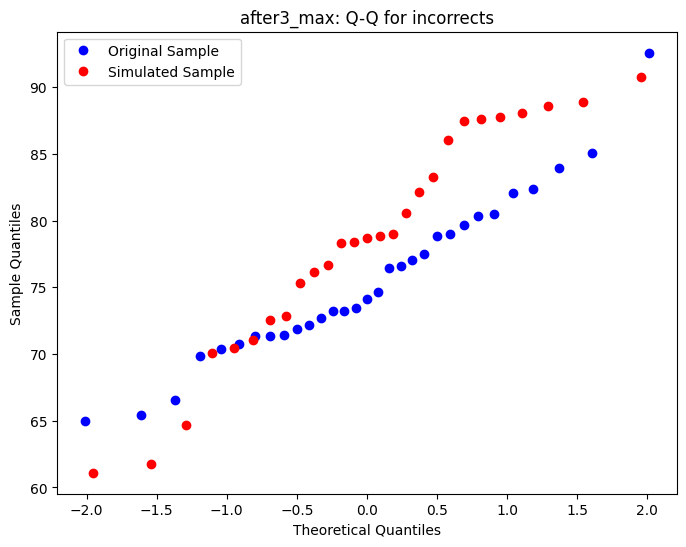

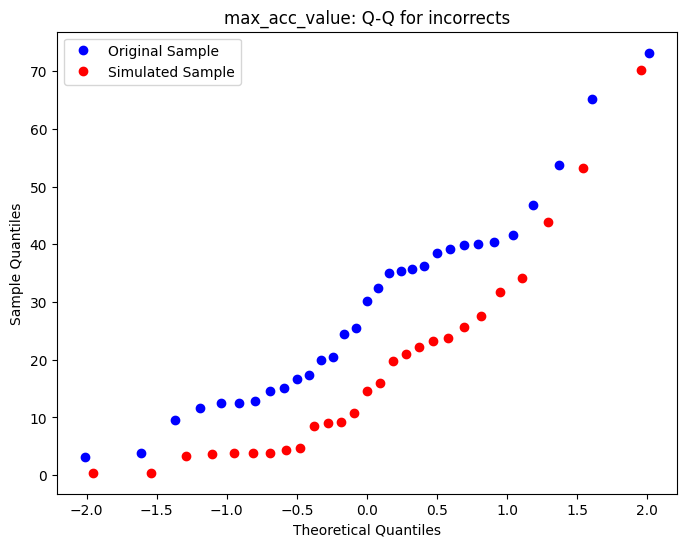

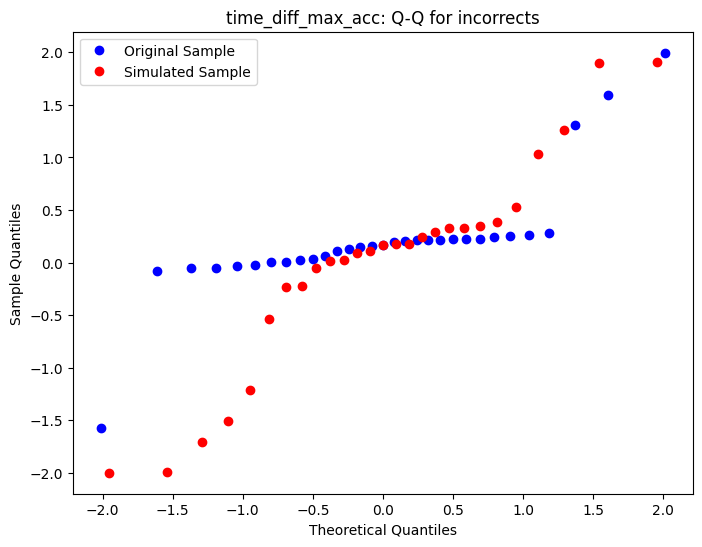

In [ ]:
# Histogram
def plot_histogram(input_df, variable, color):
  plt.hist(input_df[variable], bins=4, density=True, alpha=0.5, color=color)

for v in variable_under_investigation:
  plot_histogram(hit_incorrect, v, 'g')
  plot_histogram(other_hit_incorrect, v, 'b')
  plt.title(f'{v}: Histogram for incorrects')
  plt.show()

"""
# Q-Q plots
stats.probplot(hit_incorrect[variable_under_investigation], dist="norm", plot=plt)
plt.show()

stats.probplot(other_hit_incorrect[variable_under_investigation], dist="norm", plot=plt)
plt.show()

"""
def plot_QQ(sample1, sample2):
  # Q-Q plot for the original sample
  (osm1, osr1), (slope1, intercept1, r1) = stats.probplot(sample1, dist="norm", plot=None)

  # Q-Q plot for the simulated sample
  (osm2, osr2), (slope2, intercept2, r2) = stats.probplot(sample2, dist="norm", plot=None)

  # Plotting
  plt.figure(figsize=(8, 6))
  plt.plot(osm1, osr1, 'o', label='Original Sample', color='blue')
  plt.plot(osm2, osr2, 'o', label='Simulated Sample', color='red')

  """
  # Plot the reference line
  min_val = min(min(osm1), min(osm2))
  max_val = max(max(osm1), max(osm2))
  plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
  """

  plt.xlabel('Theoretical Quantiles')
  plt.ylabel('Sample Quantiles')
  plt.legend()
  plt.title(f'{v}: Q-Q for incorrects')
  plt.show()

for v in variable_under_investigation:
  plot_QQ(hit_incorrect[v], other_hit_incorrect[v])

In [ ]:
def do_stat_tests(input_df, variable, category_label=None):
  print(f"\nDescriptive Statistics for {variable} (where {category_label} == 1):")

  # Shapiro-Wilk test for normality
  shapiro_stat, shapiro_p = stats.shapiro(input_df[variable])
  print(f"Shapiro-Wilk Test: Statistic={shapiro_stat}, p-value={shapiro_p}")

  # Kolmogorov-Smirnov test for normality
  mean = input_df[variable].mean()
  std = input_df[variable].std()
  ks_stat, ks_p = stats.kstest(input_df[variable], 'norm', args=(mean, std))
  print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat}, p-value={ks_p}")

  # Anderson-Darling test for normality
  ad_result = stats.anderson(input_df[variable], dist='norm')
  print(f"Anderson-Darling Test: Statistic={ad_result.statistic}, Critical Values={ad_result.critical_values}")

for v in variable_under_investigation:
  do_stat_tests(hit_incorrect, v, category_label='hit_incorrect')
  do_stat_tests(other_hit_incorrect, v, category_label='other_hit_incorrect')


Descriptive Statistics for confidence score (where hit_incorrect == 1):
Shapiro-Wilk Test: Statistic=0.8112229108810425, p-value=8.387181151192635e-05
Kolmogorov-Smirnov Test: Statistic=0.3291537000653208, p-value=0.0017108559957529357
Anderson-Darling Test: Statistic=3.0061678507196206, Critical Values=[0.522 0.595 0.713 0.832 0.99 ]

Descriptive Statistics for confidence score (where other_hit_incorrect == 1):
Shapiro-Wilk Test: Statistic=0.7233323454856873, p-value=8.32892328617163e-06
Kolmogorov-Smirnov Test: Statistic=0.36842698539886226, p-value=0.0008542111370355432
Anderson-Darling Test: Statistic=3.905339530837125, Critical Values=[0.517 0.589 0.707 0.824 0.98 ]

Descriptive Statistics for experience score (where hit_incorrect == 1):
Shapiro-Wilk Test: Statistic=0.4847748279571533, p-value=2.555799349934773e-09
Kolmogorov-Smirnov Test: Statistic=0.4915243433816248, p-value=1.965120642743301e-07
Anderson-Darling Test: Statistic=8.24077165929414, Critical Values=[0.522 0.595 0.

In [ ]:
# Function to calculate AIC and BIC
def calculate_aic_bic(log_likelihood, num_params, n):
    aic = 2 * num_params - 2 * log_likelihood
    bic = num_params * np.log(n) - 2 * log_likelihood
    return aic, bic

"""
AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)

AIC is a measure used for model selection that balances model fit and complexity.
BIC is another criterion for model selection that penalizes model complexity more strongly than AIC.

Lower AIC and BIC values indicate a better model fit.
Compare the values of different models; the model with the smallest AIC and/or BIC is preferred.

For example, if Model 1 has an AIC (or BIC) value of -56.5 and Model 2 has an AIC (or BIC) value of -103.3,
then Model 2 offers a better fit. It doesn’t matter if both AIC (or BIC) values are negative.
"""
def test_distributions(features):
  # List of distributions to test
  distributions = {
      'Normal': stats.norm,
      'Exponential': stats.expon,
      'Log-Normal': stats.lognorm,
      'Gamma': stats.gamma,
      'Beta': stats.beta,
      'Weibull': stats.weibull_min,
      'Student\'s t': stats.t,
      'Chi-Squared': stats.chi2,
      'F': stats.f,
      'Uniform': stats.uniform
  }
  # Distributions left out
  """
  'Binomial': stats.binom,
  'Poisson': stats.poisson,
  'Geometric': stats.geom,
  'Negative Binomial': stats.nbinom,
  'Hypergeometric': stats.hypergeom
  """
  # Fit distributions and calculate AIC/BIC
  results = []

  for name, distribution in distributions.items():
      try:
          # Fit the distribution to the data
          params = distribution.fit(features)

          # Calculate log-likelihood
          log_likelihood = np.sum(distribution.logpdf(features, *params))

          # Number of parameters
          num_params = len(params)

          # Number of data points
          n = len(features)

          # Calculate AIC and BIC
          aic, bic = calculate_aic_bic(log_likelihood, num_params, n)

          # Store the results
          results.append((name, aic, bic))

      except Exception as e:
          print(f"Could not fit {name}: {e}")

  # Convert results to DataFrame for easier viewing
  return pd.DataFrame(results, columns=['Distribution', 'AIC', 'BIC'])

# Display the results
categories = {'Hit Incorrect': hit_incorrect, 'Other Hit Incorrect': other_hit_incorrect}
for name, features in categories.items():
  for v in variable_under_investigation:
    print(f'\n\nTesting: {v} in {name}\n')
    print(test_distributions(features[v]).sort_values(by='AIC'))
    print(test_distributions(features[v]).sort_values(by='BIC'))

"""
Ignore the warnings about "Could not fit":
Binomial, Poisson, Geometric, Negative Binomial, Hypergeometric
These are discrete distributions, and I don't think we have discrete data
But I will leave it in, in case you disagree.
"""



Testing: confidence score in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
6  Student's t -883.720402 -879.418440
2   Log-Normal  -95.343799  -91.041838
7  Chi-Squared  -45.876055  -41.574093
0       Normal   68.864259   71.732234
5      Weibull   69.498775   73.800736
3        Gamma   69.879055   74.181016
1  Exponential   71.727146   74.595120
8            F   71.871506   77.607455
4         Beta   71.879055   77.615004
9      Uniform   72.113962   74.981936


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
6  Student's t -883.720402 -879.418440
2   Log-Normal  -95.343799  -91.041838
7  Chi-Squared  -45.876055  -41.574093
0       Normal   68.864259   71.732234
5      Weibull   69.498775   73.800736
3        Gamma   69.879055   74.181016
1  Exponential   71.727146   74.595120
9      Uniform   72.113962   74.981936
8            F   71.871506   77.607455
4         Beta   71.879055   77.615004


Testing: experience score in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution          AIC          BIC
2   Log-Normal -1461.531456 -1457.229494
3        Gamma -1283.163906 -1278.861944
5      Weibull -1219.690261 -1215.388299
8            F -1124.711988 -1118.976039
7  Chi-Squared  -766.956860  -762.654898
6  Student's t  -502.831294  -498.529332
4         Beta    13.854555    19.590504
1  Exponential    32.295842    35.163817
9      Uniform    72.113962    74.981936
0       Normal   102.510638   105.378613


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution          AIC          BIC
2   Log-Normal -1461.531456 -1457.229494
3        Gamma -1283.163906 -1278.861944
5      Weibull -1219.690261 -1215.388299
8            F -1124.711988 -1118.976039
7  Chi-Squared  -766.956860  -762.654898
6  Student's t  -502.831294  -498.529332
4         Beta    13.854555    19.590504
1  Exponential    32.295842    35.163817
9      Uniform    72.113962    74.981936
0       Normal   102.510638   105.378613


Testing: games played prior on current day in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution           AIC           BIC
2   Log-Normal -29313.784059 -29309.482097
5      Weibull  -1770.316757  -1766.014796
7  Chi-Squared  -1468.960058  -1464.658096
6  Student's t  -1446.984373  -1442.682412
3        Gamma  -1441.503327  -1437.201366
8            F   -808.243739   -802.507791
4         Beta    -79.583824    -73.847875
1  Exponential     20.991906     23.859880
9      Uniform     46.975125     49.843100
0       Normal     70.966760     73.834734


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution           AIC           BIC
2   Log-Normal -29313.784059 -29309.482097
5      Weibull  -1770.316757  -1766.014796
7  Chi-Squared  -1468.960058  -1464.658096
6  Student's t  -1446.984373  -1442.682412
3        Gamma  -1441.503327  -1437.201366
8            F   -808.243739   -802.507791
4         Beta    -79.583824    -73.847875
1  Exponential     20.991906     23.859880
9      Uniform     46.975125     49.843100
0       Normal     70.966760     73.834734


Testing: winner_streak in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution           AIC           BIC
2   Log-Normal -27822.407292 -27818.105330
5      Weibull  -2003.024628  -1998.722666
3        Gamma  -1661.740905  -1657.438943
6  Student's t  -1431.532342  -1427.230381
4         Beta  -1338.686198  -1332.950249
7  Chi-Squared  -1241.142509  -1236.840547
8            F   -781.035354   -775.299405
1  Exponential     32.295842     35.163817
0       Normal     85.978386     88.846360
9      Uniform     89.950250     92.818225


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution           AIC           BIC
2   Log-Normal -27822.407292 -27818.105330
5      Weibull  -2003.024628  -1998.722666
3        Gamma  -1661.740905  -1657.438943
6  Student's t  -1431.532342  -1427.230381
4         Beta  -1338.686198  -1332.950249
7  Chi-Squared  -1241.142509  -1236.840547
8            F   -781.035354   -775.299405
1  Exponential     32.295842     35.163817
0       Normal     85.978386     88.846360
9      Uniform     89.950250     92.818225


Testing: favorite fruit_prume in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution          AIC          BIC
2   Log-Normal -8486.900981 -8482.599019
6  Student's t -1359.438185 -1355.136223
4         Beta -1163.552944 -1157.816995
7  Chi-Squared  -149.820339  -145.518378
8            F  -102.248555   -96.512606
9      Uniform     4.000000     6.867974
5      Weibull    14.928303    19.230265
0       Normal    34.396676    37.264651
3        Gamma    38.341894    42.643856
1  Exponential    52.663094    55.531069


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution          AIC          BIC
2   Log-Normal -8486.900981 -8482.599019
6  Student's t -1359.438185 -1355.136223
4         Beta -1163.552944 -1157.816995
7  Chi-Squared  -149.820339  -145.518378
8            F  -102.248555   -96.512606
9      Uniform     4.000000     6.867974
5      Weibull    14.928303    19.230265
0       Normal    34.396676    37.264651
3        Gamma    38.341894    42.643856
1  Exponential    52.663094    55.531069


Testing: favorite fruit_strawberry in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution           AIC           BIC
2   Log-Normal -36775.623714 -36771.321752
5      Weibull  -2502.253411  -2497.951449
3        Gamma  -2346.578790  -2342.276829
4         Beta  -2097.472992  -2091.737043
8            F  -1774.204623  -1768.468674
6  Student's t  -1038.418712  -1034.116751
7  Chi-Squared   -974.581025   -970.279064
1  Exponential    -35.818120    -32.950145
9      Uniform      4.000000      6.867974
0       Normal     34.396676     37.264651


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution           AIC           BIC
2   Log-Normal -36775.623714 -36771.321752
5      Weibull  -2502.253411  -2497.951449
3        Gamma  -2346.578790  -2342.276829
4         Beta  -2097.472992  -2091.737043
8            F  -1774.204623  -1768.468674
6  Student's t  -1038.418712  -1034.116751
7  Chi-Squared   -974.581025   -970.279064
1  Exponential    -35.818120    -32.950145
9      Uniform      4.000000      6.867974
0       Normal     34.396676     37.264651


Testing: duration round_seconds in Hit Incorrect

  Distribution         AIC         BIC
4         Beta  201.230201  206.966150
1  Exponential  202.440891  205.308865
5      Weibull  202.476098  206.778059
3        Gamma  203.156698  207.458659
7  Chi-Squared  203.156698  207.458659
2   Log-Normal  204.859924  209.161885
8            F  205.156702  210.892651
9      Uniform  205.786998  208.654972
0       Normal  210.090126  212.958100
6  Student's t  212.090126  216.392087
  Distribution         AIC         BIC
1  Expo

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  211.658811  214.526786
5      Weibull  213.144788  217.446749
6  Student's t  213.528183  217.830145
2   Log-Normal  213.658872  217.960834
3        Gamma  214.074369  218.376331
4         Beta  215.275427  221.011375
8            F  215.738202  221.474151
9      Uniform  219.541253  222.409227
1  Exponential  236.364006  239.231980
7  Chi-Squared  237.043233  241.345195


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  211.658811  214.526786
5      Weibull  213.144788  217.446749
6  Student's t  213.528183  217.830145
2   Log-Normal  213.658872  217.960834
3        Gamma  214.074369  218.376331
4         Beta  215.275427  221.011375
8            F  215.738202  221.474151
9      Uniform  219.541253  222.409227
1  Exponential  236.364006  239.231980
7  Chi-Squared  237.043233  241.345195


Testing: before2_mean in Hit Incorrect

  Distribution         AIC         BIC
0       Normal  210.095114  212.963089
5      Weibull  211.629057  215.931018
6  Student's t  212.053361  216.355323
2   Log-Normal  212.095124  216.397086
3        Gamma  212.414450  216.716411
7  Chi-Squared  212.849557  217.151519
4         Beta  213.779643  219.515592
8            F  214.152686  219.888635
9      Uniform  214.394851  217.262826
1  Exponential  231.242638  234.110612
  Distribution         AIC         BIC
0       Normal  210.095114  212.963089
5      Weibull  211.62

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  209.321391  212.189366
5      Weibull  210.873821  215.175782
6  Student's t  211.205946  215.507908
2   Log-Normal  211.321418  215.623380
3        Gamma  211.646357  215.948319
7  Chi-Squared  211.988316  216.290278
4         Beta  213.012654  218.748603
8            F  213.378716  219.114665
9      Uniform  213.514025  216.382000
1  Exponential  228.992257  231.860232


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  209.321391  212.189366
5      Weibull  210.873821  215.175782
6  Student's t  211.205946  215.507908
2   Log-Normal  211.321418  215.623380
3        Gamma  211.646357  215.948319
7  Chi-Squared  211.988316  216.290278
9      Uniform  213.514025  216.382000
4         Beta  213.012654  218.748603
8            F  213.378716  219.114665
1  Exponential  228.992257  231.860232


Testing: before1_mean in Hit Incorrect

  Distribution         AIC         BIC
9      Uniform  211.459096  214.327071
0       Normal  211.627304  214.495278
5      Weibull  213.217387  217.519348
2   Log-Normal  213.617168  217.919130
3        Gamma  213.617483  217.919445
6  Student's t  213.627420  217.929382
7  Chi-Squared  213.699768  218.001730
4         Beta  214.350723  220.086672
8            F  215.616394  221.352342
1  Exponential  234.271488  237.139462
  Distribution         AIC         BIC
9      Uniform  211.459096  214.327071
0       Normal  211.62

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  210.471159  214.773120
3        Gamma  210.551667  214.853628
2   Log-Normal  210.654364  214.956325
0       Normal  211.833338  214.701313
4         Beta  212.463231  218.199180
6  Student's t  213.734704  218.036666
8            F  214.040028  219.775977
9      Uniform  214.895727  217.763702
1  Exponential  219.995719  222.863693
7  Chi-Squared  369.763891  374.065852


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
0       Normal  211.833338  214.701313
5      Weibull  210.471159  214.773120
3        Gamma  210.551667  214.853628
2   Log-Normal  210.654364  214.956325
9      Uniform  214.895727  217.763702
6  Student's t  213.734704  218.036666
4         Beta  212.463231  218.199180
8            F  214.040028  219.775977
1  Exponential  219.995719  222.863693
7  Chi-Squared  369.763891  374.065852


Testing: after1_min in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
7  Chi-Squared  210.879657  215.181619
3        Gamma  210.879657  215.181619
2   Log-Normal  210.909247  215.211209
5      Weibull  211.053260  215.355222
0       Normal  212.145552  215.013527
4         Beta  212.875526  218.611475
6  Student's t  214.130293  218.432254
8            F  214.384981  220.120929
9      Uniform  214.714693  217.582667
1  Exponential  221.947177  224.815152


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
0       Normal  212.145552  215.013527
7  Chi-Squared  210.879657  215.181619
3        Gamma  210.879657  215.181619
2   Log-Normal  210.909247  215.211209
5      Weibull  211.053260  215.355222
9      Uniform  214.714693  217.582667
6  Student's t  214.130293  218.432254
4         Beta  212.875526  218.611475
8            F  214.384981  220.120929
1  Exponential  221.947177  224.815152


Testing: after1_max in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  210.257799  214.559761
3        Gamma  210.675225  214.977187
2   Log-Normal  210.895583  215.197545
0       Normal  212.003252  214.871226
4         Beta  212.296903  218.032852
6  Student's t  213.984644  218.286606
8            F  214.330884  220.066833
9      Uniform  215.076235  217.944209
1  Exponential  217.901769  220.769744
7  Chi-Squared  296.616226  300.918188


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  210.257799  214.559761
0       Normal  212.003252  214.871226
3        Gamma  210.675225  214.977187
2   Log-Normal  210.895583  215.197545
9      Uniform  215.076235  217.944209
4         Beta  212.296903  218.032852
6  Student's t  213.984644  218.286606
8            F  214.330884  220.066833
1  Exponential  217.901769  220.769744
7  Chi-Squared  296.616226  300.918188


Testing: after2_mean in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
3        Gamma  204.202049  208.504011
2   Log-Normal  204.275210  208.577171
5      Weibull  204.294938  208.596899
4         Beta  206.190838  211.926786
0       Normal  207.131890  209.999864
9      Uniform  208.531385  211.399359
8            F  209.025160  214.761109
6  Student's t  209.068638  213.370600
1  Exponential  211.920661  214.788635
7  Chi-Squared  367.203751  371.505713


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
3        Gamma  204.202049  208.504011
2   Log-Normal  204.275210  208.577171
5      Weibull  204.294938  208.596899
0       Normal  207.131890  209.999864
9      Uniform  208.531385  211.399359
4         Beta  206.190838  211.926786
6  Student's t  209.068638  213.370600
8            F  209.025160  214.761109
1  Exponential  211.920661  214.788635
7  Chi-Squared  367.203751  371.505713


Testing: after2_min in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  203.395525  207.697487
3        Gamma  203.891147  208.193109
2   Log-Normal  204.204261  208.506223
4         Beta  205.318308  211.054256
0       Normal  206.084962  208.952937
6  Student's t  208.084944  212.386906
9      Uniform  208.188763  211.056738
8            F  208.256414  213.992363
1  Exponential  209.288341  212.156315
7  Chi-Squared  356.087318  360.389279


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  203.395525  207.697487
3        Gamma  203.891147  208.193109
2   Log-Normal  204.204261  208.506223
0       Normal  206.084962  208.952937
4         Beta  205.318308  211.054256
9      Uniform  208.188763  211.056738
1  Exponential  209.288341  212.156315
6  Student's t  208.084944  212.386906
8            F  208.256414  213.992363
7  Chi-Squared  356.087318  360.389279


Testing: after2_max in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
2   Log-Normal  205.085836  209.387798
3        Gamma  205.247409  209.549371
5      Weibull  205.845744  210.147706
4         Beta  207.247685  212.983633
0       Normal  208.741615  211.609589
6  Student's t  209.731154  214.033116
8            F  210.306940  216.042889
9      Uniform  212.200596  215.068570
1  Exponential  214.613482  217.481456
7  Chi-Squared  384.874410  389.176372


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
2   Log-Normal  205.085836  209.387798
3        Gamma  205.247409  209.549371
5      Weibull  205.845744  210.147706
0       Normal  208.741615  211.609589
4         Beta  207.247685  212.983633
6  Student's t  209.731154  214.033116
9      Uniform  212.200596  215.068570
8            F  210.306940  216.042889
1  Exponential  214.613482  217.481456
7  Chi-Squared  384.874410  389.176372


Testing: after3_mean in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  202.135012  206.436973
3        Gamma  202.524819  206.826781
2   Log-Normal  202.646288  206.948250
0       Normal  203.709776  206.577751
4         Beta  204.373786  210.109735
8            F  204.686667  210.422616
6  Student's t  205.499345  209.801307
1  Exponential  208.642878  211.510852
9      Uniform  210.021740  212.889714
7  Chi-Squared  351.440037  355.741998


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  202.135012  206.436973
0       Normal  203.709776  206.577751
3        Gamma  202.524819  206.826781
2   Log-Normal  202.646288  206.948250
6  Student's t  205.499345  209.801307
4         Beta  204.373786  210.109735
8            F  204.686667  210.422616
1  Exponential  208.642878  211.510852
9      Uniform  210.021740  212.889714
7  Chi-Squared  351.440037  355.741998


Testing: after3_min in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  201.469046  205.771007
3        Gamma  202.120947  206.422908
2   Log-Normal  202.543868  206.845830
4         Beta  203.512036  209.247984
8            F  205.083112  210.819061
1  Exponential  205.141173  208.009148
0       Normal  205.195810  208.063785
6  Student's t  207.067412  211.369374
9      Uniform  210.271880  213.139855
7  Chi-Squared  336.453330  340.755292


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  201.469046  205.771007
3        Gamma  202.120947  206.422908
2   Log-Normal  202.543868  206.845830
1  Exponential  205.141173  208.009148
0       Normal  205.195810  208.063785
4         Beta  203.512036  209.247984
8            F  205.083112  210.819061
6  Student's t  207.067412  211.369374
9      Uniform  210.271880  213.139855
7  Chi-Squared  336.453330  340.755292


Testing: after3_max in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
5      Weibull  202.967550  207.269512
0       Normal  203.086238  205.954212
3        Gamma  203.222263  207.524225
2   Log-Normal  203.263352  207.565314
6  Student's t  204.879382  209.181343
4         Beta  205.176504  210.912453
8            F  205.921774  211.657723
9      Uniform  209.770586  212.638561
1  Exponential  211.819295  214.687269
7  Chi-Squared  363.270447  367.572408


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
0       Normal  203.086238  205.954212
5      Weibull  202.967550  207.269512
3        Gamma  203.222263  207.524225
2   Log-Normal  203.263352  207.565314
6  Student's t  204.879382  209.181343
4         Beta  205.176504  210.912453
8            F  205.921774  211.657723
9      Uniform  209.770586  212.638561
1  Exponential  211.819295  214.687269
7  Chi-Squared  363.270447  367.572408


Testing: max_acc_value in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  257.357557  263.093506
5      Weibull  264.413959  268.715921
3        Gamma  265.392633  269.694595
2   Log-Normal  265.988684  270.290646
0       Normal  266.969011  269.836985
8            F  267.392652  273.128601
9      Uniform  267.403414  270.271388
1  Exponential  267.870816  270.738791
6  Student's t  268.969002  273.270963
7  Chi-Squared  352.114700  356.416661


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  257.357557  263.093506
5      Weibull  264.413959  268.715921
3        Gamma  265.392633  269.694595
0       Normal  266.969011  269.836985
9      Uniform  267.403414  270.271388
2   Log-Normal  265.988684  270.290646
1  Exponential  267.870816  270.738791
8            F  267.392652  273.128601
6  Student's t  268.969002  273.270963
7  Chi-Squared  352.114700  356.416661


Testing: time_diff_max_acc in Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
6  Student's t   14.946762   19.248723
0       Normal   57.063643   59.931618
2   Log-Normal   58.513500   62.815461
3        Gamma   58.615130   62.917092
4         Beta   60.597245   66.333194
9      Uniform   82.946730   85.814704
7  Chi-Squared   97.067466  101.369428
1  Exponential  102.150797  105.018772
8            F  123.880303  129.616252
5      Weibull         inf         inf


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
6  Student's t   14.946762   19.248723
0       Normal   57.063643   59.931618
2   Log-Normal   58.513500   62.815461
3        Gamma   58.615130   62.917092
4         Beta   60.597245   66.333194
9      Uniform   82.946730   85.814704
7  Chi-Squared   97.067466  101.369428
1  Exponential  102.150797  105.018772
8            F  123.880303  129.616252
5      Weibull         inf         inf


Testing: confidence score in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
6  Student's t -972.701520 -968.814009
2   Log-Normal -125.108075 -121.220564
7  Chi-Squared  -91.245238  -87.357727
9      Uniform   41.429948   44.021621
0       Normal   47.275319   49.866993
5      Weibull   49.162817   53.050327
3        Gamma   49.313260   53.200770
4         Beta   51.281770   56.465118
8            F   51.288833   56.472181
1  Exponential   53.844104   56.435778


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
6  Student's t -972.701520 -968.814009
2   Log-Normal -125.108075 -121.220564
7  Chi-Squared  -91.245238  -87.357727
9      Uniform   41.429948   44.021621
0       Normal   47.275319   49.866993
5      Weibull   49.162817   53.050327
3        Gamma   49.313260   53.200770
1  Exponential   53.844104   56.435778
4         Beta   51.281770   56.465118
8            F   51.288833   56.472181


Testing: experience score in Other Hit Incorrect

  Distribution          AIC          BIC
2   Log-Normal -1065.966849 -1062.079338
5      Weibull  -957.515126  -953.627615
3        Gamma  -907.378601  -903.491091
7  Chi-Squared  -567.524914  -563.637404
8            F  -352.613508  -347.430160
4         Beta    33.762905    38.946252
1  Exponential    51.639716    54.231390
9      Uniform    63.325064    65.916737
0       Normal    97.617328   100.209001
6  Student's t    99.617328   103.504838
  Distribution          AIC          BIC
2   Log-Normal -1065.966849

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution           AIC           BIC
2   Log-Normal -24906.392278 -24902.504767
7  Chi-Squared  -2036.580237  -2032.692726
5      Weibull  -1425.584173  -1421.696662
4         Beta  -1211.674892  -1206.491544
6  Student's t   -932.317251   -928.429740
8            F   -684.364944   -679.181596
3        Gamma   -590.933240   -587.045729
1  Exponential     18.532075     21.123748
9      Uniform     41.429948     44.021621
0       Normal     60.344815     62.936489


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution           AIC           BIC
2   Log-Normal -24906.392278 -24902.504767
7  Chi-Squared  -2036.580237  -2032.692726
5      Weibull  -1425.584173  -1421.696662
4         Beta  -1211.674892  -1206.491544
6  Student's t   -932.317251   -928.429740
8            F   -684.364944   -679.181596
3        Gamma   -590.933240   -587.045729
1  Exponential     18.532075     21.123748
9      Uniform     41.429948     44.021621
0       Normal     60.344815     62.936489


Testing: winner_streak in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  Distribution           AIC           BIC
2   Log-Normal -21918.275765 -21914.388254
3        Gamma  -1440.411426  -1436.523916
5      Weibull  -1294.412104  -1290.524593
6  Student's t   -838.040778   -834.153267
8            F   -596.870250   -591.686902
7  Chi-Squared   -468.491530   -464.604019
4         Beta    -71.405711    -66.222364
1  Exponential     49.341497     51.933171
9      Uniform     63.325064     65.916737
0       Normal     86.372082     88.963756


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  Distribution           AIC           BIC
2   Log-Normal -21918.275765 -21914.388254
3        Gamma  -1440.411426  -1436.523916
5      Weibull  -1294.412104  -1290.524593
6  Student's t   -838.040778   -834.153267
8            F   -596.870250   -591.686902
7  Chi-Squared   -468.491530   -464.604019
4         Beta    -71.405711    -66.222364
1  Exponential     49.341497     51.933171
9      Uniform     63.325064     65.916737
0       Normal     86.372082     88.963756


Testing: favorite fruit_prume in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  Distribution           AIC           BIC
2   Log-Normal -11513.666740 -11509.779229
4         Beta   -387.081763   -381.898415
8            F   -200.940606   -195.757259
7  Chi-Squared    -32.609306    -28.721795
9      Uniform      4.000000      6.591674
5      Weibull     30.056456     33.943966
0       Normal     38.292264     40.883938
1  Exponential     39.024514     41.616188
6  Student's t     40.292264     44.179775
3        Gamma     41.318560     45.206071


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  Distribution           AIC           BIC
2   Log-Normal -11513.666740 -11509.779229
4         Beta   -387.081763   -381.898415
8            F   -200.940606   -195.757259
7  Chi-Squared    -32.609306    -28.721795
9      Uniform      4.000000      6.591674
5      Weibull     30.056456     33.943966
0       Normal     38.292264     40.883938
1  Exponential     39.024514     41.616188
6  Student's t     40.292264     44.179775
3        Gamma     41.318560     45.206071


Testing: favorite fruit_strawberry in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution           AIC           BIC
2   Log-Normal -27891.348322 -27887.460811
5      Weibull  -1440.466302  -1436.578791
7  Chi-Squared  -1205.904840  -1202.017329
8            F   -824.453995   -819.270647
3        Gamma   -596.172227   -592.284717
4         Beta    -57.769533    -52.586186
6  Student's t    -52.902253    -49.014742
1  Exponential     -7.685348     -5.093674
9      Uniform      4.000000      6.591674
0       Normal     38.292264     40.883938


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution           AIC           BIC
2   Log-Normal -27891.348322 -27887.460811
5      Weibull  -1440.466302  -1436.578791
7  Chi-Squared  -1205.904840  -1202.017329
8            F   -824.453995   -819.270647
3        Gamma   -596.172227   -592.284717
4         Beta    -57.769533    -52.586186
6  Student's t    -52.902253    -49.014742
1  Exponential     -7.685348     -5.093674
9      Uniform      4.000000      6.591674
0       Normal     38.292264     40.883938


Testing: duration round_seconds in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  138.047859  143.231206
3        Gamma  140.620904  144.508415
5      Weibull  149.530422  153.417932
8            F  153.761322  158.944669
7  Chi-Squared  157.023508  160.911018
1  Exponential  157.586148  160.177821
2   Log-Normal  160.514535  164.402045
9      Uniform  175.208380  177.800054
6  Student's t  178.642304  182.529814
0       Normal  181.400740  183.992414


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  138.047859  143.231206
3        Gamma  140.620904  144.508415
5      Weibull  149.530422  153.417932
8            F  153.761322  158.944669
1  Exponential  157.586148  160.177821
7  Chi-Squared  157.023508  160.911018
2   Log-Normal  160.514535  164.402045
9      Uniform  175.208380  177.800054
6  Student's t  178.642304  182.529814
0       Normal  181.400740  183.992414


Testing: before3_mean in Other Hit Incorrect

  Distribution         AIC         BIC
0       Normal  194.976943  197.568617
9      Uniform  196.693962  199.285636
3        Gamma  196.917478  200.804989
2   Log-Normal  196.919294  200.806805
7  Chi-Squared  196.957177  200.844688
5      Weibull  196.963797  200.851308
6  Student's t  196.976946  200.864456
4         Beta  198.571648  203.754995
8            F  198.918018  204.101365
1  Exponential  216.563348  219.155022
  Distribution         AIC         BIC
0       Normal  194.976943  197.568617
9      Uniform  

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  194.305670  196.897343
2   Log-Normal  196.160187  200.047698
3        Gamma  196.163968  200.051478
7  Chi-Squared  196.211033  200.098544
6  Student's t  196.296140  200.183650
5      Weibull  196.579123  200.466633
8            F  198.162849  203.346197
4         Beta  198.180902  203.364249
9      Uniform  201.806338  204.398012
1  Exponential  217.644298  220.235972


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  194.305670  196.897343
2   Log-Normal  196.160187  200.047698
3        Gamma  196.163968  200.051478
7  Chi-Squared  196.211033  200.098544
6  Student's t  196.296140  200.183650
5      Weibull  196.579123  200.466633
8            F  198.162849  203.346197
4         Beta  198.180902  203.364249
9      Uniform  201.806338  204.398012
1  Exponential  217.644298  220.235972


Testing: before2_min in Other Hit Incorrect

  Distribution         AIC         BIC
0       Normal  193.197653  195.789326
2   Log-Normal  195.090353  198.977863
3        Gamma  195.090399  198.977910
7  Chi-Squared  195.100935  198.988446
6  Student's t  195.197654  199.085164
5      Weibull  195.339375  199.226886
8            F  197.090402  202.273750
4         Beta  197.091184  202.274531
9      Uniform  198.459526  201.051200
1  Exponential  216.121593  218.713267
  Distribution         AIC         BIC
0       Normal  193.197653  195.789326
2   Log-Normal  1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  195.789250  198.380924
2   Log-Normal  197.578787  201.466298
3        Gamma  197.588111  201.475621
7  Chi-Squared  197.596869  201.484379
6  Student's t  197.768852  201.656363
5      Weibull  198.164203  202.051714
8            F  199.584261  204.767608
4         Beta  199.593207  204.776554
9      Uniform  204.920952  207.512626
1  Exponential  219.182645  221.774319


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  195.789250  198.380924
2   Log-Normal  197.578787  201.466298
3        Gamma  197.588111  201.475621
7  Chi-Squared  197.596869  201.484379
6  Student's t  197.768852  201.656363
5      Weibull  198.164203  202.051714
8            F  199.584261  204.767608
4         Beta  199.593207  204.776554
9      Uniform  204.920952  207.512626
1  Exponential  219.182645  221.774319


Testing: before1_mean in Other Hit Incorrect

  Distribution         AIC         BIC
0       Normal  198.649388  201.241062
2   Log-Normal  200.410021  204.297531
3        Gamma  200.410224  204.297734
7  Chi-Squared  200.410964  204.298475
5      Weibull  200.605472  204.492983
6  Student's t  200.649188  204.536699
8            F  202.410116  207.593463
4         Beta  202.411144  207.594492
9      Uniform  205.803465  208.395139
1  Exponential  219.119700  221.711374
  Distribution         AIC         BIC
0       Normal  198.649388  201.241062
2   Log-Normal  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  198.901472  201.493145
2   Log-Normal  200.620052  204.507562
3        Gamma  200.628774  204.516285
6  Student's t  200.799005  204.686516
5      Weibull  201.081264  204.968775
8            F  202.623861  207.807209
4         Beta  202.637762  207.821109
9      Uniform  208.031388  210.623061
1  Exponential  220.791589  223.383263
7  Chi-Squared  511.607284  515.494794


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  198.901472  201.493145
2   Log-Normal  200.620052  204.507562
3        Gamma  200.628774  204.516285
6  Student's t  200.799005  204.686516
5      Weibull  201.081264  204.968775
8            F  202.623861  207.807209
4         Beta  202.637762  207.821109
9      Uniform  208.031388  210.623061
1  Exponential  220.791589  223.383263
7  Chi-Squared  511.607284  515.494794


Testing: after1_mean in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  198.219570  200.811244
5      Weibull  200.065576  203.953086
6  Student's t  200.198685  204.086195
2   Log-Normal  200.219575  204.107085
3        Gamma  200.431194  204.318704
7  Chi-Squared  200.725131  204.612641
4         Beta  202.085610  207.268957
8            F  202.244941  207.428288
9      Uniform  203.912335  206.504008
1  Exponential  221.162378  223.754052


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  198.219570  200.811244
5      Weibull  200.065576  203.953086
6  Student's t  200.198685  204.086195
2   Log-Normal  200.219575  204.107085
3        Gamma  200.431194  204.318704
7  Chi-Squared  200.725131  204.612641
9      Uniform  203.912335  206.504008
4         Beta  202.085610  207.268957
8            F  202.244941  207.428288
1  Exponential  221.162378  223.754052


Testing: after1_min in Other Hit Incorrect

  Distribution         AIC         BIC
0       Normal  198.122160  200.713834
5      Weibull  199.718480  203.605991
6  Student's t  200.122162  204.009673
2   Log-Normal  200.122279  204.009790
3        Gamma  200.350040  204.237551
7  Chi-Squared  200.720789  204.608300
9      Uniform  201.298841  203.890514
4         Beta  201.778268  206.961615
8            F  202.154568  207.337915
1  Exponential  219.560408  222.152082
  Distribution         AIC         BIC
0       Normal  198.122160  200.713834
5      Weibull  19

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  198.640803  201.232476
6  Student's t  200.333792  204.221303
2   Log-Normal  200.640835  204.528346
5      Weibull  200.730596  204.618107
3        Gamma  200.797071  204.684582
7  Chi-Squared  200.993930  204.881441
4         Beta  202.571759  207.755107
8            F  203.354283  208.537631
9      Uniform  206.418557  209.010231
1  Exponential  222.752543  225.344217


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  Distribution         AIC         BIC
0       Normal  198.640803  201.232476
6  Student's t  200.333792  204.221303
2   Log-Normal  200.640835  204.528346
5      Weibull  200.730596  204.618107
3        Gamma  200.797071  204.684582
7  Chi-Squared  200.993930  204.881441
4         Beta  202.571759  207.755107
8            F  203.354283  208.537631
9      Uniform  206.418557  209.010231
1  Exponential  222.752543  225.344217


Testing: after2_mean in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  180.962523  186.145871
9      Uniform  189.087459  191.679133
5      Weibull  193.516542  197.404053
0       Normal  194.406915  196.998588
6  Student's t  196.393085  200.280595
2   Log-Normal  196.406989  200.294500
3        Gamma  197.201254  201.088765
8            F  198.437395  203.620742
1  Exponential  215.495939  218.087612
7  Chi-Squared  222.654943  226.542453


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  180.962523  186.145871
9      Uniform  189.087459  191.679133
0       Normal  194.406915  196.998588
5      Weibull  193.516542  197.404053
6  Student's t  196.393085  200.280595
2   Log-Normal  196.406989  200.294500
3        Gamma  197.201254  201.088765
8            F  198.437395  203.620742
1  Exponential  215.495939  218.087612
7  Chi-Squared  222.654943  226.542453


Testing: after2_min in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  188.304820  193.488167
9      Uniform  189.947958  192.539632
5      Weibull  193.492149  197.379660
0       Normal  193.596278  196.187952
6  Student's t  195.502745  199.390255
2   Log-Normal  195.596535  199.484046
3        Gamma  196.315956  200.203466
8            F  197.688973  202.872320
1  Exponential  215.384297  217.975971
7  Chi-Squared  362.455684  366.343194


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
9      Uniform  189.947958  192.539632
4         Beta  188.304820  193.488167
0       Normal  193.596278  196.187952
5      Weibull  193.492149  197.379660
6  Student's t  195.502745  199.390255
2   Log-Normal  195.596535  199.484046
3        Gamma  196.315956  200.203466
8            F  197.688973  202.872320
1  Exponential  215.384297  217.975971
7  Chi-Squared  362.455684  366.343194


Testing: after2_max in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  182.887614  188.070961
9      Uniform  189.480754  192.072428
5      Weibull  194.776112  198.663623
0       Normal  195.868247  198.459920
6  Student's t  197.670375  201.557886
2   Log-Normal  197.868563  201.756073
3        Gamma  198.645233  202.532744
8            F  199.987773  205.171120
7  Chi-Squared  212.613685  216.501195
1  Exponential  216.111760  218.703434


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
4         Beta  182.887614  188.070961
9      Uniform  189.480754  192.072428
0       Normal  195.868247  198.459920
5      Weibull  194.776112  198.663623
6  Student's t  197.670375  201.557886
2   Log-Normal  197.868563  201.756073
3        Gamma  198.645233  202.532744
8            F  199.987773  205.171120
7  Chi-Squared  212.613685  216.501195
1  Exponential  216.111760  218.703434


Testing: after3_mean in Other Hit Incorrect

  Distribution         AIC         BIC
4         Beta  177.355034  182.538382
9      Uniform  188.194580  190.786254
0       Normal  194.063916  196.655590
5      Weibull  194.611419  198.498929
6  Student's t  196.063918  199.951429
2   Log-Normal  196.064134  199.951644
3        Gamma  196.541447  200.428958
8            F  198.106892  203.290239
7  Chi-Squared  206.970814  210.858325
1  Exponential  211.212919  213.804593
  Distribution         AIC         BIC
4         Beta  177.355034  182.538382
9      Uniform  1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
8            F  194.106264  199.289612
5      Weibull  202.425197  206.312708
4         Beta  205.737766  210.921114
3        Gamma  205.869915  209.757425
1  Exponential  213.555744  216.147418
2   Log-Normal  219.658948  223.546458
6  Student's t  232.724248  236.611759
0       Normal  233.053152  235.644825
9      Uniform  233.225519  235.817192
7  Chi-Squared  347.142169  351.029679


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


  Distribution         AIC         BIC
8            F  194.106264  199.289612
5      Weibull  202.425197  206.312708
3        Gamma  205.869915  209.757425
4         Beta  205.737766  210.921114
1  Exponential  213.555744  216.147418
2   Log-Normal  219.658948  223.546458
0       Normal  233.053152  235.644825
9      Uniform  233.225519  235.817192
6  Student's t  232.724248  236.611759
7  Chi-Squared  347.142169  351.029679


Testing: time_diff_max_acc in Other Hit Incorrect



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


  Distribution         AIC         BIC
6  Student's t   77.485479   81.372990
9      Uniform   77.534695   80.126369
0       Normal   79.540104   82.131777
5      Weibull   80.937742   84.825252
2   Log-Normal   81.566365   85.453876
3        Gamma   81.958146   85.845657
7  Chi-Squared   82.298896   86.186406
4         Beta   83.074347   88.257695
1  Exponential   95.267008   97.858682
8            F  100.561164  105.744512


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


  Distribution         AIC         BIC
9      Uniform   77.534695   80.126369
6  Student's t   77.485479   81.372990
0       Normal   79.540104   82.131777
5      Weibull   80.937742   84.825252
2   Log-Normal   81.566365   85.453876
3        Gamma   81.958146   85.845657
7  Chi-Squared   82.298896   86.186406
4         Beta   83.074347   88.257695
1  Exponential   95.267008   97.858682
8            F  100.561164  105.744512


'\nIgnore the warnings about "Could not fit":\nBinomial, Poisson, Geometric, Negative Binomial, Hypergeometric\nThese are discrete distributions, and I don\'t think we have discrete data\nBut I will leave it in, in case you disagree.\n'

Estimated parameters for confidence score (t): (18.74811075812082, 2.79580445970955, 0.6148554534718369)
Estimated parameters for experience score (lognorm): (17.200255998082785, 4.999999999999999, 3.937961839407734e-10)
Estimated parameters for duration round_seconds (expon): (0.39, 6.960935064935065)
Estimated parameters for before3_mean (norm): (77.10099045454545, 7.542084595053645)
Estimated parameters for before3_min (norm): (76.42451558441559, 7.542501589492533)
Estimated parameters for before3_max (norm): (77.77973220779222, 7.59520292501165)
Estimated parameters for before2_mean (norm): (76.76424192640692, 7.335531161561821)
Estimated parameters for before2_min (norm): (76.12010779220779, 7.349803865731282)
Estimated parameters for before2_max (norm): (77.4078638961039, 7.367636811794858)
Estimated parameters for before1_mean (uniform): (56.4016, 41.97613333333332)
Estimated parameters for before1_min (norm): (76.03094233766234, 7.316295548768844)
Estimated parameters for befor

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Estimated parameters for max_acc_value (beta): (0.8482586342366304, 388924125.93415093, 0.13223443669999999, 11356372929.421333)
Estimated parameters for time_diff_max_acc (t): (1.0564351631600375, 0.14217530552484092, 0.21228216070863923)
   confidence score  experience score  duration round_seconds  before3_mean  \
0          3.844823          5.000000                8.146676     73.354144   
1          3.125774          5.000000               11.779635     74.634137   
2          2.585687          5.000000                4.723370     64.761571   
3          1.823532          5.000000                4.713532     64.735549   
4          3.418881          5.000048                1.047595     94.335908   

   before3_min  before3_max  before2_mean  before2_min  before2_max  \
0    71.038357    81.913109     79.618873    70.052744    76.584420   
1    72.558764    78.412543     68.608655    82.909501    58.527150   
2    71.833238    83.078436     77.907431    80.211583    81.945941   
3

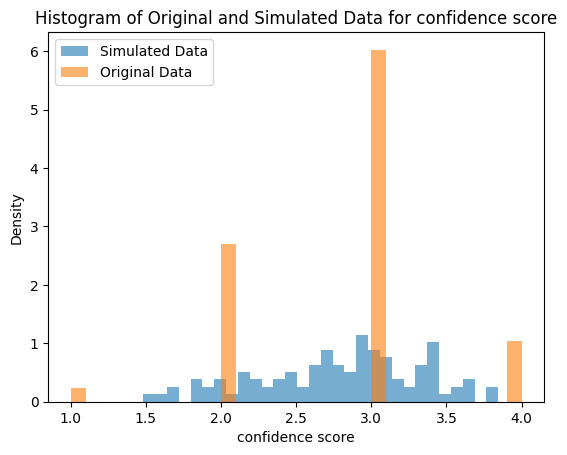

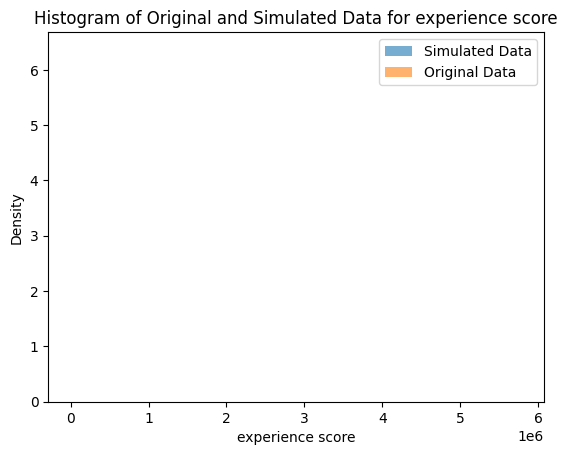

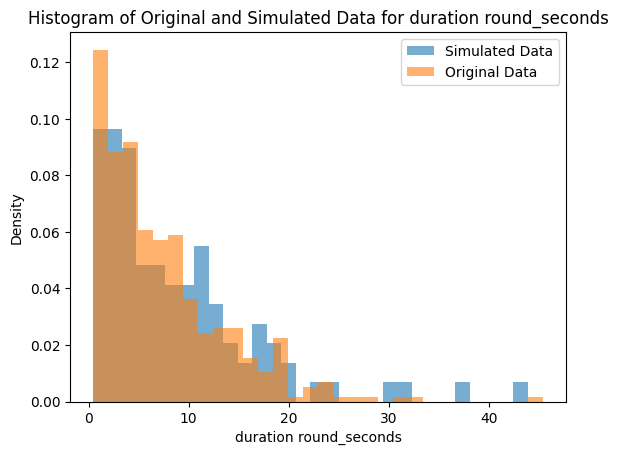

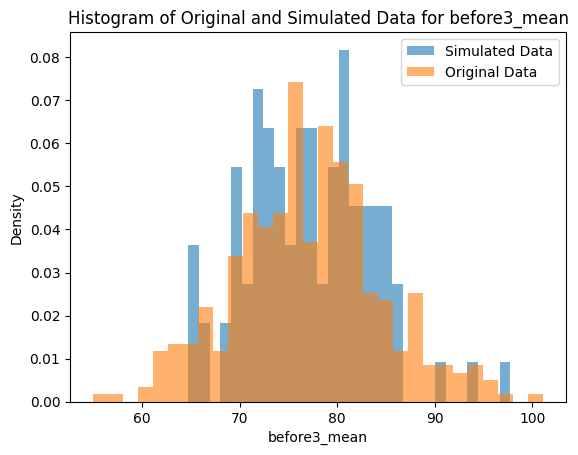

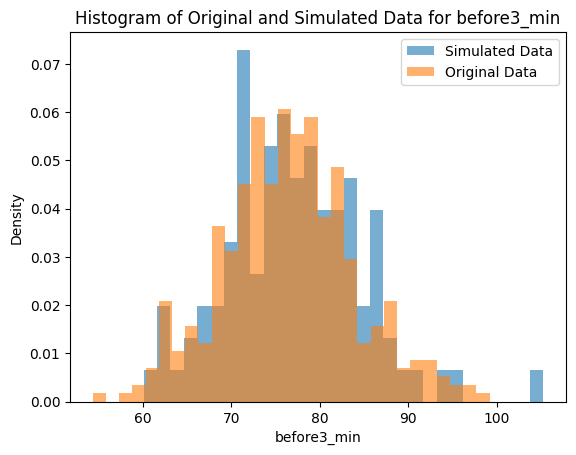

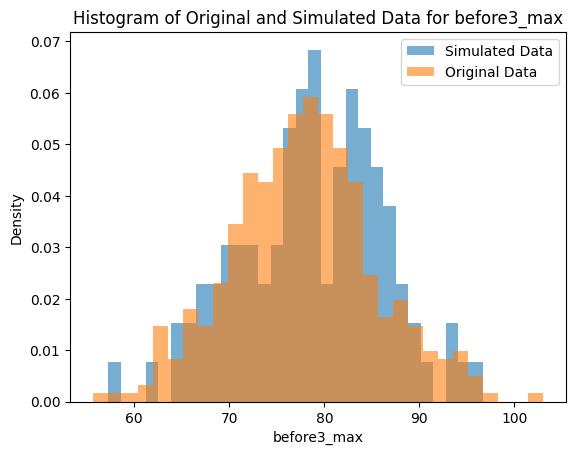

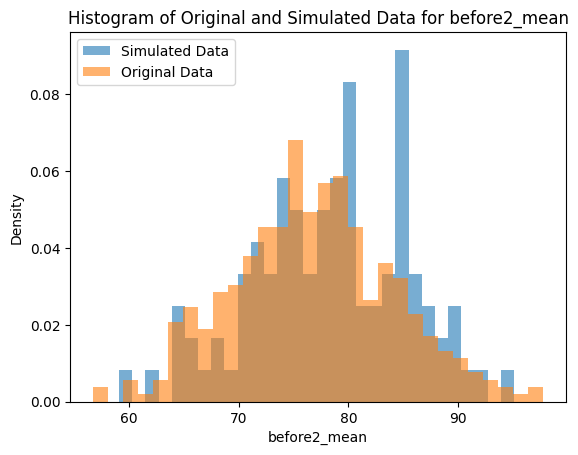

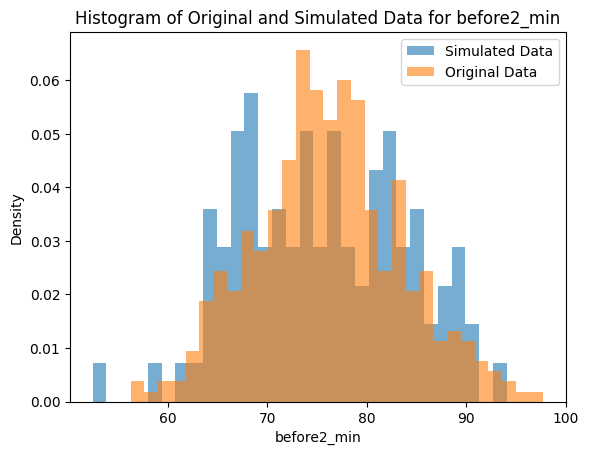

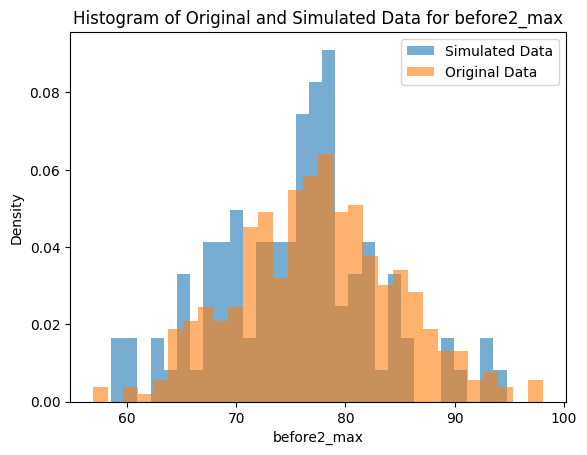

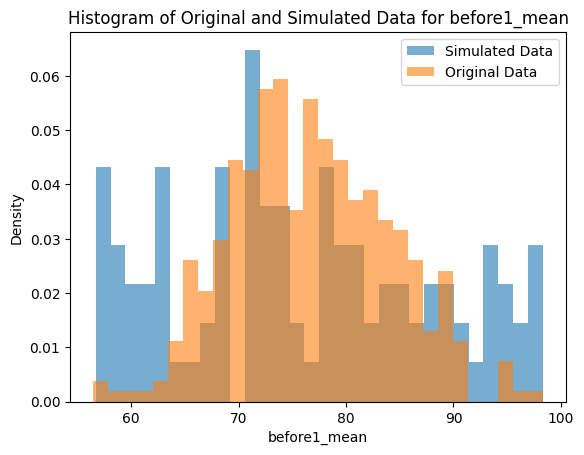

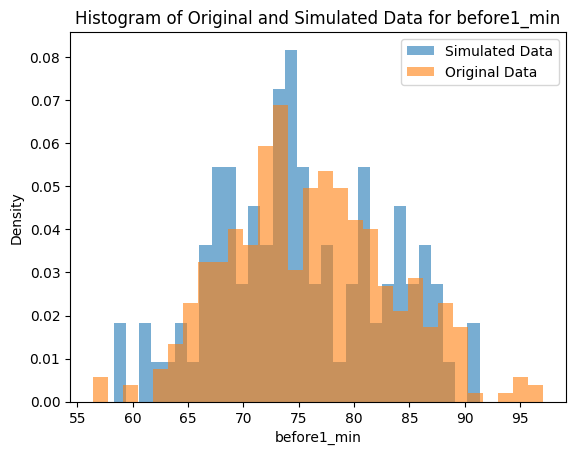

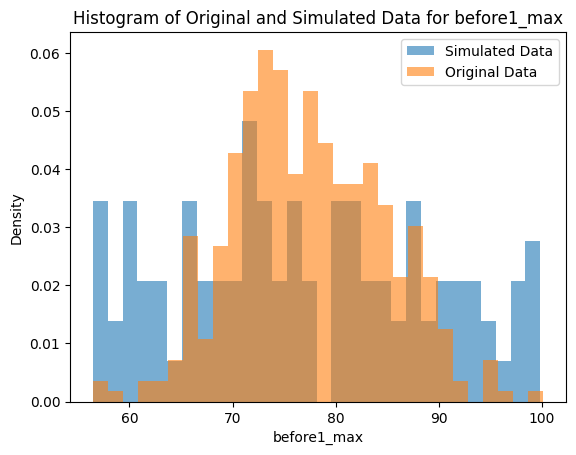

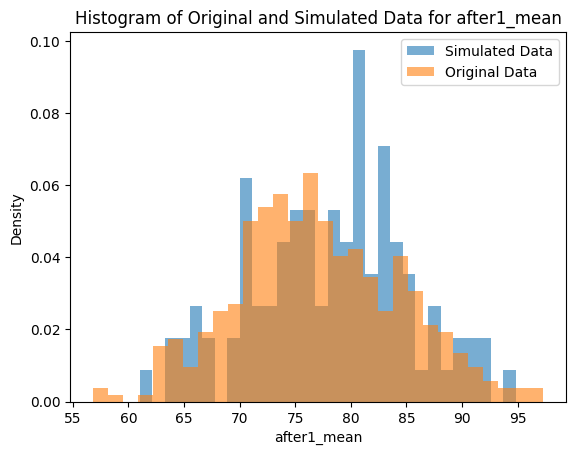

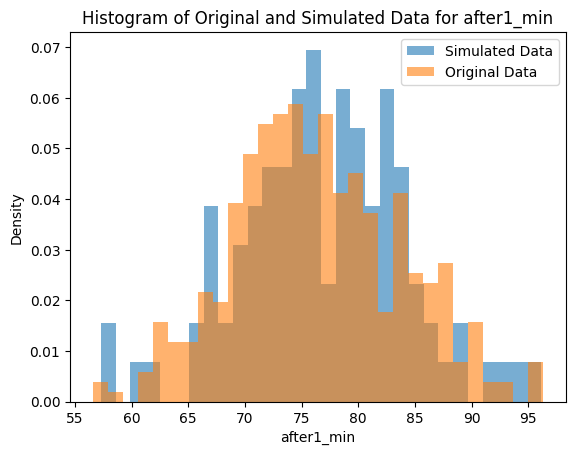

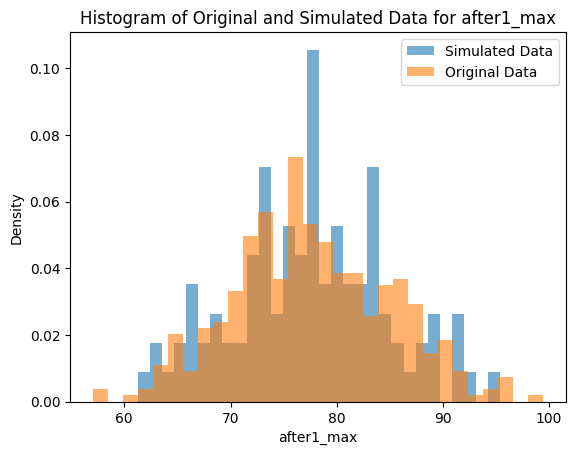

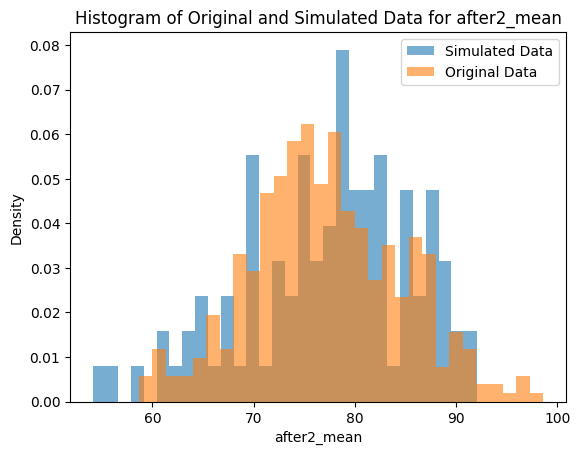

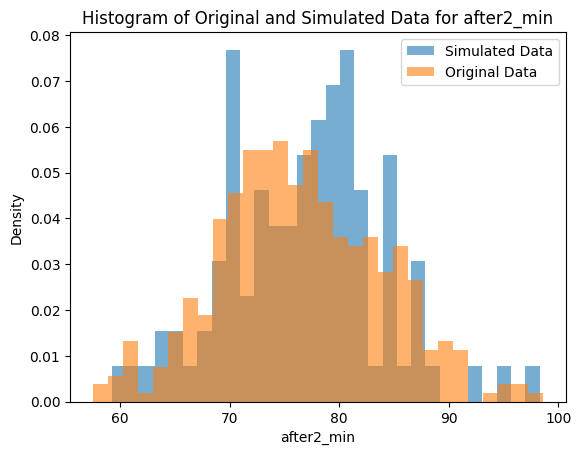

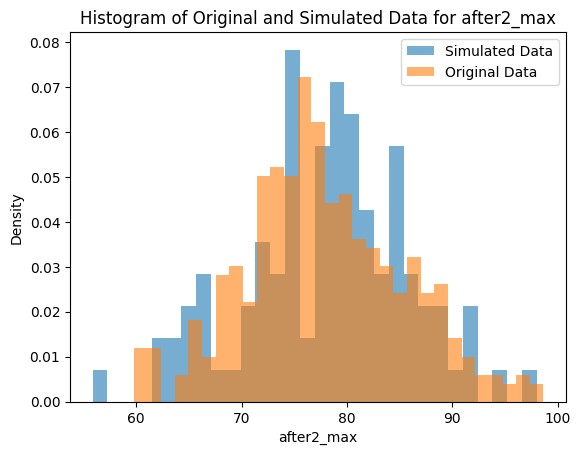

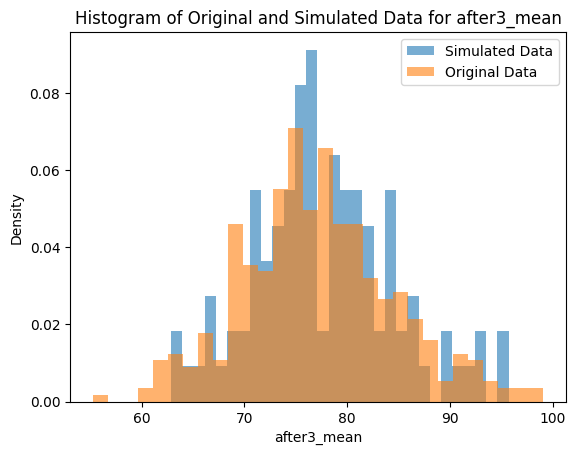

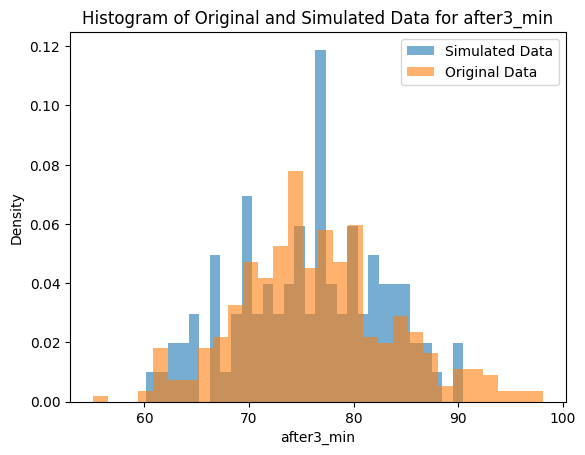

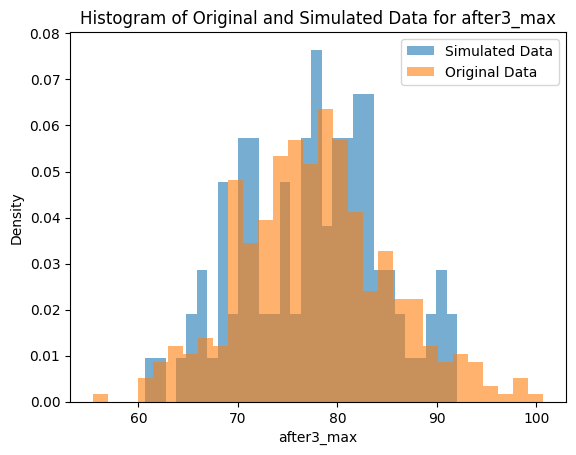

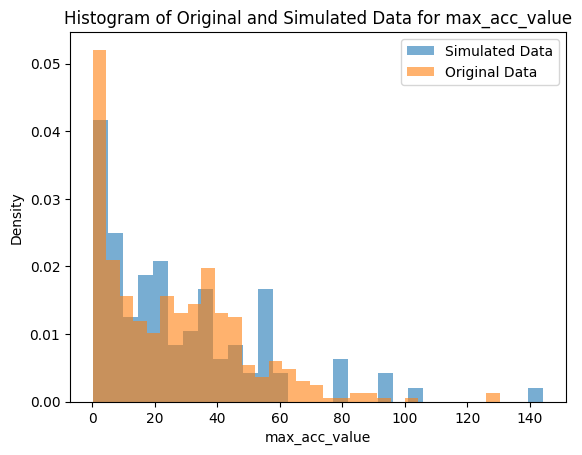

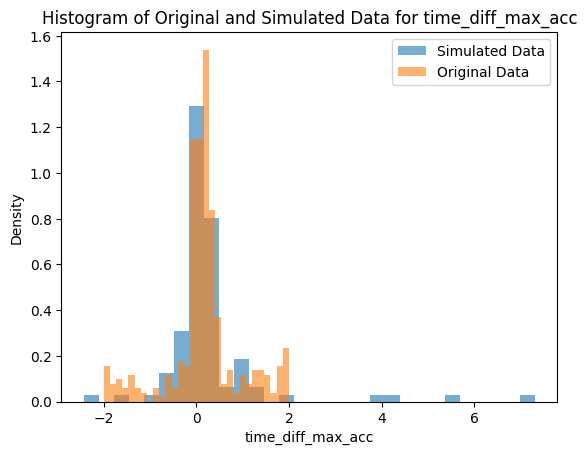

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#################################################################
#                                                               #
#                           FINAL STEP                          #
#                                                               #
#################################################################



"""Step 1: Fit the Distribution for Each Variable"""

# Define the variables and their distributions
# Basically just copy the variable_under_investigation items as keys and put in
# the distribution that makes sense based on the test above



variables = {
    'confidence score': stats.t,
    'experience score': stats.lognorm,
    'duration round_seconds': stats.expon, # These do not match for other_hit and hit
    'before3_mean': stats.norm,
    'before3_min': stats.norm,
    'before3_max': stats.norm,
    'before2_mean': stats.norm,
    'before2_min': stats.norm,
    'before2_max': stats.norm,
    'before1_mean': stats.uniform, # These do not match for other_hit and hit
    'before1_min': stats.norm,
    'before1_max': stats.uniform, # These do not match for other_hit and hit
    'after1_mean': stats.weibull_min, # These do not match for other_hit and hit
    'after1_min': stats.chi2, # These do not match for other_hit and hit
    'after1_max': stats.weibull_min, # These do not match for other_hit and hit
    'after2_mean': stats.gamma, # These do not match for other_hit and hit
    'after2_min': stats.weibull_min, # These do not match for other_hit and hit
    'after2_max': stats.lognorm, # These do not match for other_hit and hit
    'after3_mean': stats.weibull_min, # These do not match for other_hit and hit
    'after3_min': stats.weibull_min, # These do not match for other_hit and hit
    'after3_max': stats.norm, # These do not match for other_hit and hit
    'max_acc_value': stats.beta, # These do not match for other_hit and hit
    'time_diff_max_acc': stats.t # These do not match for other_hit and hit
}

# removed temporarily
"""
    'games played prior on current day': stats.lognorm,
    'winner_streak': stats.lognorm,
    'favorite fruit_prume': stats.lognorm,
    'favorite fruit_strawberry': stats.lognorm,
"""


# Fit distributions and store parameters
params = {}
for var, distribution in variables.items():
    params[var] = distribution.fit(data[var])
    print(f"Estimated parameters for {var} ({distribution.name}): {params[var]}")


"""Step 2: Simulate Data for Each Variable"""

# Number of samples to simulate
num_samples = 100

# Simulate data for each variable
simulated_data = {}
for var, distribution in variables.items():
    simulated_data[var] = distribution.rvs(*params[var], size=num_samples)


"""Step 3: Combine the Simulated Data into a Single DataFrame"""

# Combine simulated data into a DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Display the first few rows of the simulated DataFrame
print(simulated_df.head())

# Plot histograms for comparison
for var in simulated_df.columns:
    plt.hist(simulated_df[var], bins=30, density=True, alpha=0.6, label='Simulated Data')
    plt.hist(data[var], bins=30, density=True, alpha=0.6, label='Original Data')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'Histogram of Original and Simulated Data for {var}')
    plt.show()

simulated_df.to_csv('simulated_data.csv', index=False)
files.download('simulated_data.csv')



Descriptive Statistics for confidence_score (where hit_incorrect == 1):
Mean: 2.141030844155844
Standard Deviation: 0.7072913913959585
Skewness: 0.3126202353448442
Kurtosis: 0.43770710370993715

Descriptive Statistics for confidence_score (where other_hit_incorrect == 1):
Mean: 2.911178107606679
Standard Deviation: 0.5408391841781243
Skewness: 0.024003954878747243
Kurtosis: 0.7804727435946059


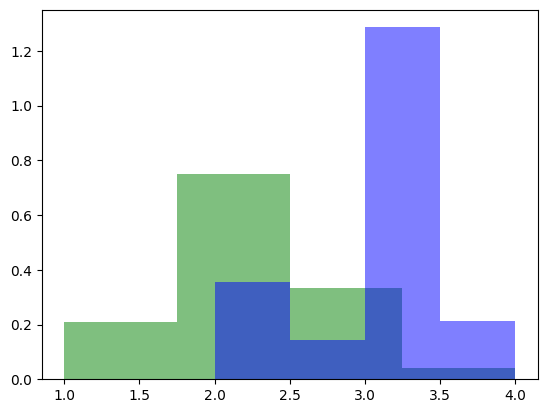

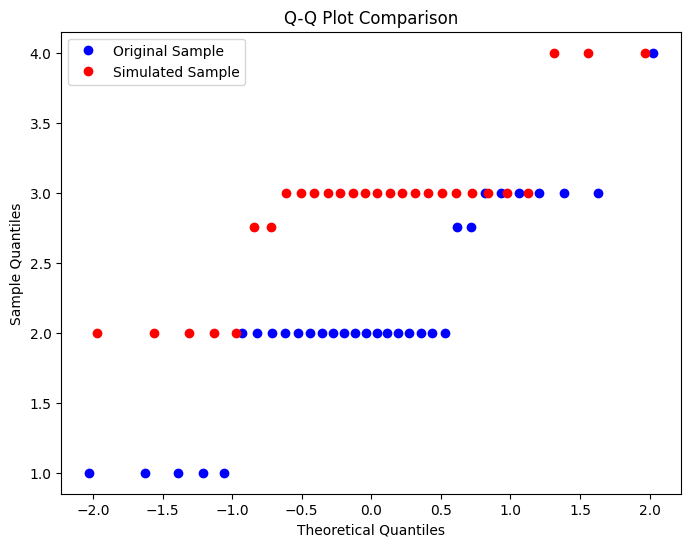


Descriptive Statistics for confidence_score (where hit_incorrect == 1):
Shapiro-Wilk Test: Statistic=0.8449204564094543, p-value=0.00032265728805214167
Kolmogorov-Smirnov Test: Statistic=0.29777337815562893, p-value=0.005190051158346254
Anderson-Darling Test: Statistic=2.4857680580677197, Critical Values=[0.523 0.596 0.715 0.834 0.992]

Descriptive Statistics for confidence_score (where other_hit_incorrect == 1):
Shapiro-Wilk Test: Statistic=0.7548443675041199, p-value=1.8810427718563005e-05
Kolmogorov-Smirnov Test: Statistic=0.32763227772776804, p-value=0.0035369377613896358
Anderson-Darling Test: Statistic=3.4711926895032086, Critical Values=[0.518 0.59  0.708 0.826 0.983]


In [ ]:
"""

MISSING
When we have simulate the data, we need to make sure that it has the same descriptives as our original data
I tried my best to make that simple, but it might require some tweaking

basically, all you have to do is to copy and paste all the functions that I made and run that on the simulated data
I have copied them all below, so you know which it is, but you will need to change the inputs.
I haven't tested this, so you migh need to play around with it.

"""

for v in variable_under_investigation:
  get_descriptives(hit_incorrect, v, printing=True, category_label='hit_incorrect')
  get_descriptives(other_hit_incorrect, v, printing=True, category_label='other_hit_incorrect')


for v in variable_under_investigation:
  plot_histogram(hit_incorrect, v, 'g')
  plot_histogram(other_hit_incorrect, v, 'b')
  plt.show()


for v in variable_under_investigation:
  plot_QQ(hit_incorrect[v], other_hit_incorrect[v])


for v in variable_under_investigation:
  do_stat_tests(hit_incorrect, v, category_label='hit_incorrect')
  do_stat_tests(other_hit_incorrect, v, category_label='other_hit_incorrect')
